# Projet 4 : Anticipez les besoins en consommation de bâtiments

La ville de Seattle a pour objectif d'atteindre la neutralité en terme d'émissions de carbone d'ici 2050. Ma mission sera de proposer un modèle de prédiction des émissions de CO2 et de la consommation totale d'énergie de bâtiment non destiné à l’habitation.

constats: 
- l’"ENERGY STAR Score", évalue la performance énergétique d'un batiment, est un calcul fastidieux à réaliser.
  Il faudra mesurer son impact et on devra l'intégrer dans la modélisation dont on jugera de son intérêt pour la
  prédiction d’émissions.
- Des relevés minutieux ont été effectués par les agents de la ville en 2016 qui se révèlent très coûteux.

Ma mission:

- Réaliser une courte analyse exploratoire.
- Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

# Sommaire:

# - I/ Nettoyage des données
# - II/ Analyse Exploratoire

# I/ Nettoyage des données

In [145]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [146]:
data_source = pd.read_csv("2016_Building_Energy_Benchmarking.csv", sep=",")

In [147]:
#Sauvegarde des données sources
data_brut = data_source.copy(deep=True)

In [148]:
data_brut.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [149]:
data_brut.shape

(3376, 46)

In [150]:
data_brut.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [151]:
data_brut.describe(include="O")

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,ComplianceStatus,Outlier
count,3376,3376,3376,3376,3376,3376,3376,3376,3367,3356,1679,596,119,3376,32
unique,8,24,3362,3354,1,1,3268,19,466,56,50,44,65,4,2
top,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,1625049001,DOWNTOWN,Multifamily Housing,Multifamily Housing,Parking,Retail Store,2016,Compliant,Low outlier
freq,1460,987,3,4,3376,3376,8,573,866,1667,976,110,14,3211,23


<AxesSubplot:>

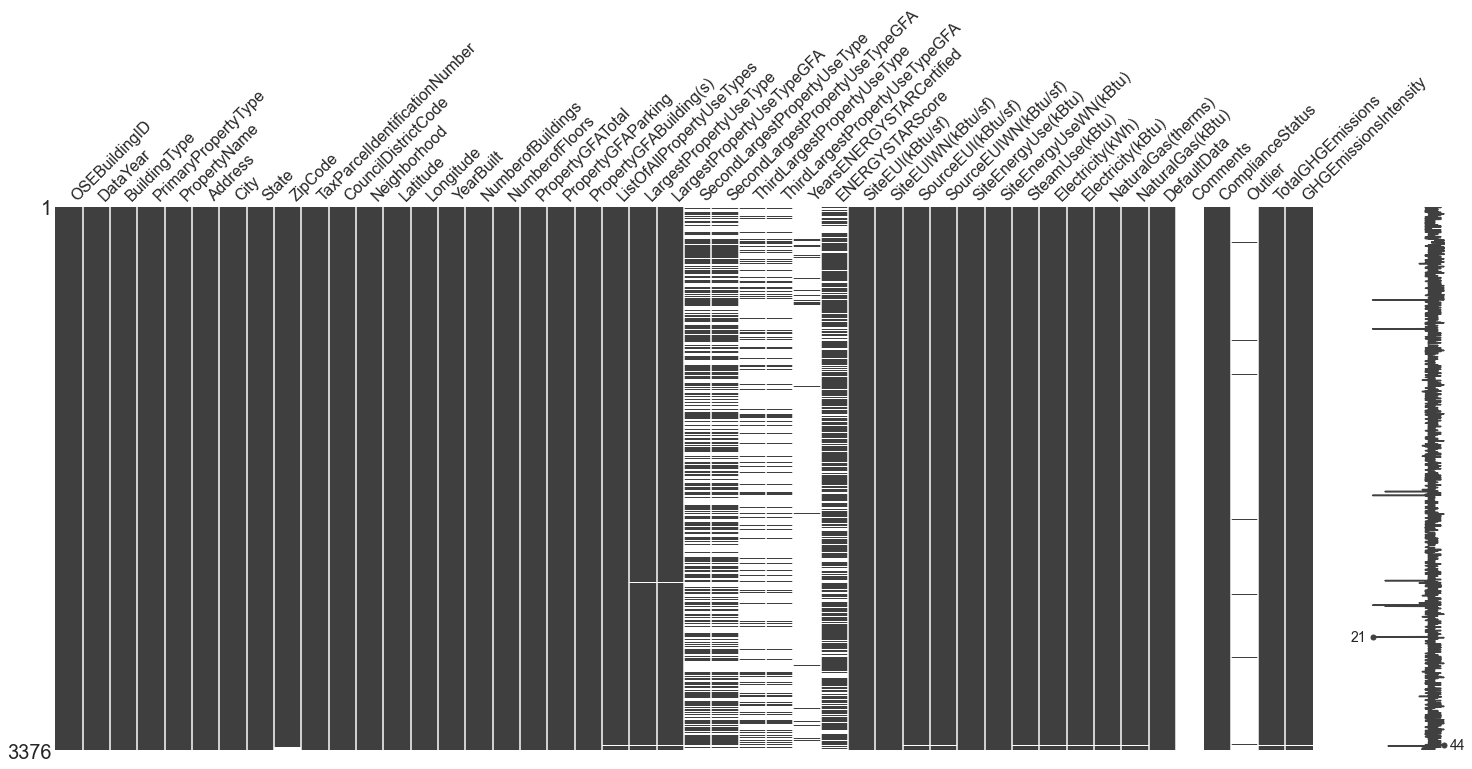

In [152]:
msno.matrix(data_brut)

In [153]:
#fonction pour calculer pour chaque colonne du dataset son taux de remplissage
def taux_remplissage(tableau):

    tab_colonne = {}
    
    for col in tableau.columns:
        tab_colonne[col] = []
        tab_colonne[col].append(round((tableau[col].notna().sum()/tableau.shape[0])*100,3))
        tab_colonne[col].append(tableau[col].isna().sum())
        tableau_remplissage = pd.DataFrame.from_dict(tab_colonne, orient="index", columns = ["Taux de remplissage", "Nombre de valeurs manquantes"]).sort_values(by="Taux de remplissage", ascending=False)
    return tableau_remplissage

In [154]:
taux_remplissage(data_brut)

,Taux de remplissage,Nombre de valeurs manquantes
OSEBuildingID,100.000,0
Neighborhood,100.000,0
DataYear,100.000,0
DefaultData,100.000,0
ComplianceStatus,100.000,0
PropertyGFABuilding(s),100.000,0
PropertyGFAParking,100.000,0
PropertyGFATotal,100.000,0
YearBuilt,100.000,0
Longitude,100.000,0


## Typage des colonnes du jeu de données

In [155]:
#On va regarder le type des colonnes
data_brut.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [156]:
data_brut["Outlier"].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

Convertir type des colonnes:
- ZipCode, NumberofBuildings,YearsENERGYSTARCertified, ENERGYSTARScore : convertir float en object
- PropertyGFATotal ,PropertyGFAParking et PropertyGFABuilding(s) : convertir Int64 en float

Supprimer colonne:
- Comments

In [157]:
data_brut["PropertyGFATotal"]=data_brut["PropertyGFATotal"].astype("float")
data_brut["PropertyGFAParking"]=data_brut["PropertyGFAParking"].astype("float")
data_brut["PropertyGFABuilding(s)"]=data_brut["PropertyGFABuilding(s)"].astype("float")

data_brut["ZipCode"]=data_brut["ZipCode"].astype('Int64').astype('object')
data_brut["DataYear"]=data_brut["DataYear"].astype('object')
data_brut["OSEBuildingID"]=data_brut["OSEBuildingID"].astype('object')
data_brut["CouncilDistrictCode"]=data_brut["CouncilDistrictCode"].astype('object')
data_brut["YearBuilt"]=data_brut["YearBuilt"].astype('object')
data_brut["NumberofBuildings"]=data_brut["NumberofBuildings"].astype('Int64')
data_brut["YearsENERGYSTARCertified"]=data_brut["YearsENERGYSTARCertified"].astype('object')
data_brut["ENERGYSTARScore"]=data_brut["ENERGYSTARScore"].astype('Int64').astype('object')

In [158]:
data_brut["DataYear"].unique()

array([2016], dtype=object)

In [159]:
data_brut.describe()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,47.624033,-122.334795,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,0.047758,0.027203,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,47.499170,-122.414250,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,47.599860,-122.350662,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,47.618675,-122.332495,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,47.657115,-122.319407,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,47.733870,-122.220966,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [160]:
data_brut.describe(include="O")

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Neighborhood,YearBuilt,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,ENERGYSTARScore,ComplianceStatus,Outlier
count,3376,3376,3376,3376,3376,3376,3376,3376,3360,3376,...,3376,3376,3367,3356,1679,596,119,2533,3376,32
unique,3376,1,8,24,3362,3354,1,1,55,3268,...,19,113,466,56,50,44,65,100,4,2
top,49787,2016,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,98109,1625049001,...,DOWNTOWN,2000,Multifamily Housing,Multifamily Housing,Parking,Retail Store,2016,100,Compliant,Low outlier
freq,1,3376,1460,987,3,4,3376,3376,294,8,...,573,72,866,1667,976,110,14,109,3211,23


## Bâtiments non destinés à l’habitation
La ville de seattle souhaite porter son étude sur les bâtiments non destinés à l’habitation.
La variable "BuildingType" comporte la classification des types de bâtiments de la ville de Seattle, en ce qui nous concerne le type d'habitation à savoir résidentiel ou non résidentiel.

In [161]:
data_brut["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Je vais écarter les lignes comportant l'intitulé "Multifamily", à savoir les habitations résidentiels.

In [162]:
data_brut = data_brut[~data_brut["BuildingType"].str.contains("Multifamily")]

In [163]:
data_brut["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [164]:
data_brut.shape

(1668, 46)

## Traitement des variables redondantes/doublons pour notre projet

In [165]:
data_brut["OSEBuildingID"].duplicated(keep=False).sum()

0

Il n'y a pas de doublon, chaque batiment dans le jeu de données est unique.

On a quelques variables qui sont exprimés dans plusieurs unités:
- KBtu: kBTU ( kilo British Thermal Unit) signifie kilo (mille) unités thermiques britanniques, une unité commune de mesure de l'énergie;
- Therms: Un therm est égal à 100 pieds cubes de gaz naturel;
- kWh: Le kWh (kilo Watt heure) est l'unité traditionnelle de mesure de l'énergie électrique. 
On va garder l'unité KBtu pour avoir toutes les variables à la même unité et donc supprimer les variables avec les autres unités.

On a une variable "SourceEUIWN(kBtu/sf)" avec le suffixe WN (Weather Normalized), c'est à dire qui prennent en compte les conditions météos. Nous allons la supprimer car nous allons garder d'autres variables pour les prédictions.

In [166]:
data_brut = data_brut.drop(columns=["NaturalGas(therms)","Electricity(kWh)", "SourceEUIWN(kBtu/sf)"])

In [167]:
data_brut.shape

(1668, 43)

In [168]:
# On va supprimer les lignes vides s'il y en a
lignes_vides =data_brut.index[data_brut.isnull().all(axis=1)]
data_brut.drop(lignes_vides,axis=0,inplace=True)

In [169]:
data_brut.shape

(1668, 43)

Pas de ligne vide avec les variables

In [170]:
#On supprime les colonnes vides, ici la variable "Comments"
del data_brut["Comments"]

On va supprimer les lignes comportant des outliers dans la colonne "Outlier"

In [171]:
data_brut["Outlier"].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [172]:
#data_brut = data_brut[~data_brut["Outlier"].str.contains("outlier")]

data_hout = data_brut[data_brut["Outlier"] =="High outlier"].index
data_lout = data_brut[data_brut["Outlier"]=="Low outlier"].index


In [173]:
data_brut.drop(data_hout,axis=0, inplace=True)
data_brut.drop(data_lout,axis=0, inplace=True)

In [174]:
data_brut.shape

(1651, 42)

In [175]:
data_brut["Outlier"].unique()

array([nan], dtype=object)

In [176]:
del data_brut["Outlier"]

On a supprimé les 17 lignes contenants des outliers puis la colonne "Outlier" car elle est très peu rempli (0,9%).

In [177]:
data_brut.shape

(1651, 41)

In [178]:
data_brut["ComplianceStatus"].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [179]:
data_brut["ComplianceStatus"].value_counts()

Compliant                       1548
Error - Correct Default Data      86
Missing Data                      14
Non-Compliant                      3
Name: ComplianceStatus, dtype: int64

On va supprimer les lignes non conformes, ici 103, à savoir:
- Error - Correct Default Data      86 
- Non-Compliant                     3
- Missing Data                      14

In [180]:
data_brut = data_brut[data_brut["ComplianceStatus"].str.contains("Compliant")]
data_brut = data_brut[~data_brut["ComplianceStatus"].str.contains("Non-Compliant")]

In [181]:
data_brut.shape

(1548, 41)

On a aussi des variables qui sont très peu remplies, et non pertinentes pour les modélisations qu'on souhaite effectuer: On va les supprimer.

- DefaultData;
- ComplianceStatus;
- TaxParcelIdentificationNumber;
- CouncilDistrictCode;
- City;
- State;

In [182]:
data_brut = data_brut.drop(columns=["DefaultData", "ComplianceStatus","State","TaxParcelIdentificationNumber","CouncilDistrictCode","City"])

In [183]:
data_brut.shape

(1548, 35)

# II/ Analyse Exploratoire

Analyses uni et bi-variées des variables;
matrice des corrélations.

In [184]:
#Sauvegarde des données nettoyées
data_2016 = data_brut.copy(deep=True)

### Répartition des différentes types de bâtiments présents le jeu de données

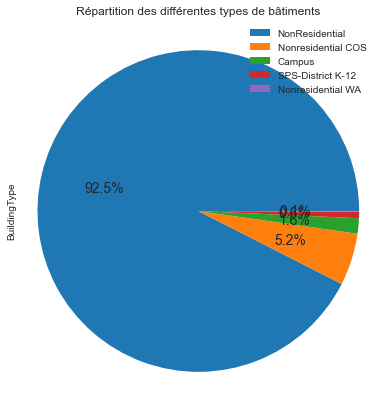

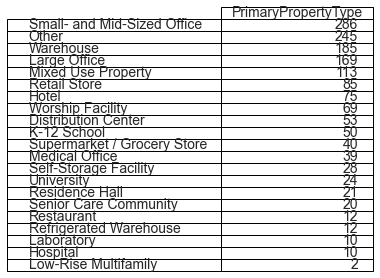

In [185]:
plt.figure(figsize=(14,7))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
plt.title("Répartition des différentes types de bâtiments")
data_2016["BuildingType"].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ax=ax1, legend=True,fontsize=14,labels= None, startangle=0, shadow=False,)
plt.axis('equal') # Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.show()

from pandas.plotting import table
# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, data_2016["PrimaryPropertyType"].value_counts(), loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

On observe que 92,5% des bâtiments sont de type "Non Residential" (non résidentiel) et qu'une grande partie de ces bâtiments sont des bureaux de petite et moyenne taille.

### Les années de constructions des bâtiments

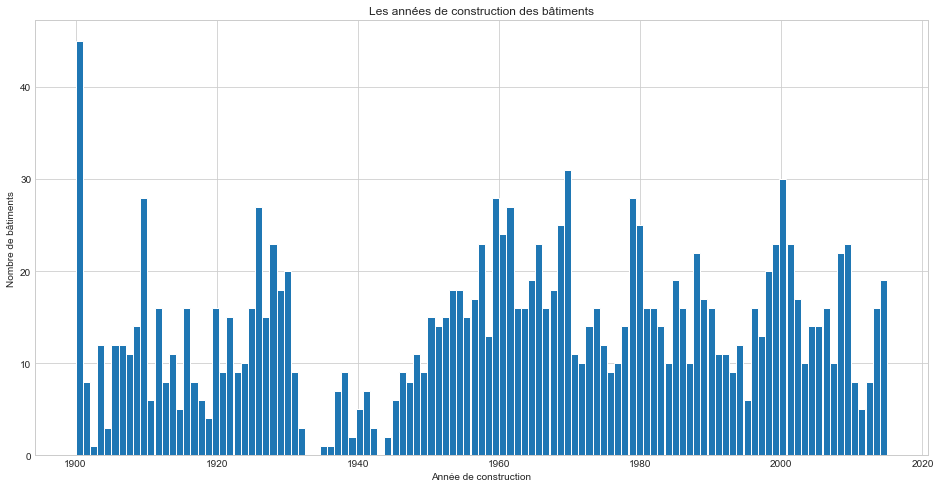

In [186]:
plt.figure(figsize=(16,8))
plt.title("Les années de construction des bâtiments")
plt.xlabel("Année de construction")
plt.ylabel("Nombre de bâtiments")
plt.hist(data_2016["YearBuilt"], 113, width = 1, edgecolor = 'white')
plt.show()

La répartition des constructions des bâtiments de la ville de seattle est relativement homogène même si on constate
une baisse importante entre 1930 et 1945 durant la grande dépression(crise de 1929 à la seconde guerre mondiale).
Après cette crise, la majorité des bâtiments a été construite après la seconde guerre mondiale.

On va créer une nouvelle variable, "Age", pour remplacer celle de l'année de construction du bâtiment "YearBuilt", on aura la même distribution.

In [187]:
data_2016["Building_Age"] = data_2016.apply(lambda row: row["DataYear"]-row["YearBuilt"], axis=1)

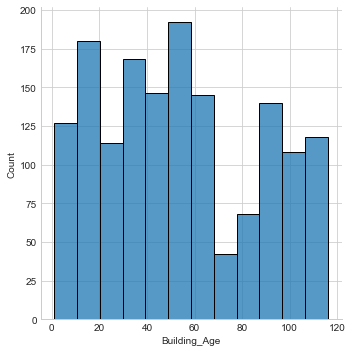

In [188]:
#plt.figure(figsize=(16,8))
#plt.title("L'âge des bâtiments")
#plt.xlabel("L'âge")
#plt.ylabel("Nombre de bâtiments")
sns.displot(data=data_2016["Building_Age"])

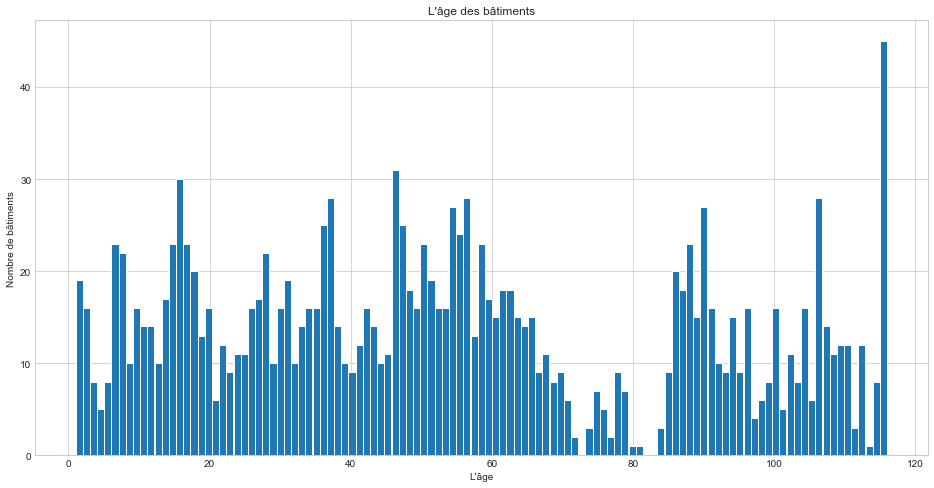

In [189]:
plt.figure(figsize=(16,8))
plt.title("L'âge des bâtiments")
plt.xlabel("L'âge")
plt.ylabel("Nombre de bâtiments")
plt.hist(data_2016["Building_Age"], 113, width = 1, edgecolor = 'white')
plt.show()

### Les corrélations linéaires 

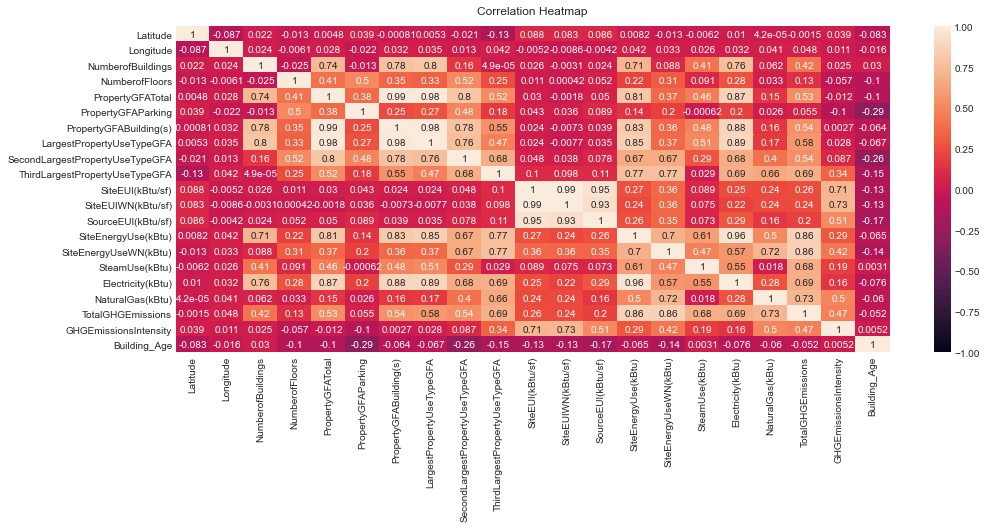

In [190]:
# taille de la heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data_2016.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

La heatmap mets en lumière la corrélation linéaire des variables du jeu de données. Il faudra prendre en compte la multicolinéarité (https://larmarange.github.io/analyse-R/multicolinearite.html) c'est à dire lorsque deux ou plusieurs variables mesurent la même chose.
"Mais une forte multicolinéarité entre plusieurs variables peut poser problème dans l’estimation et l’interprétation d’un modèle."

Ici ce qui nous intéresse ce sont les variables que l'on va utiliser pour la prédiction: "TotalGHGEmissions","GHGEmissionsIntensity","SiteEUIWN" et "SiteEnergyUseWN(kBtu)".

- "TotalGHGEmissions" est la quantité totale d'émissions de gaz à effet de serre, y compris le dioxyde de carbone, le méthane et les gaz d'oxyde nitreux libérés dans l'atmosphère à la suite de la consommation d'énergie de la propriété, mesurée en tonnes métriques d'équivalent dioxyde de carbone.
- "GHGEmissionsIntensity", ce sont les émissions totales de gaz à effet de serre divisées par la surface de plancher brute de la propriété, mesurée en kilogrammes d'équivalent en dioxyde de carbone par pied carré.
- "SiteEUIWN", c'est l'intensité de consommation d'énergie du site (EUI) normalisée par les conditions météorologiques (WN) est l'énergie du site WN d'une propriété divisée par sa surface de plancher brute (en pieds carrés).
- "SiteEnergyUseWN(kBtu)" est la quantité annuelle d'énergie consommée par la propriété à partir de toutes les  sources d'énergie, ajustée à ce que la propriété aurait consommé dans des conditions météorologiques moyennes sur 30 ans.

On observe qu'elles sont fortement corrélées entres elles, et les deux variables sont corrélées à :
variables liées à la surface
- PropertyGFATotal - surface de plancher brute totale du bâtiment et du stationnement.
- NumberofBuildings - Nombre de bâtiments inclus dans le rapport de la propriété.
- PropertyGFABuilding(s) - Espace au sol total en pieds carrés entre les surfaces extérieures des murs d'enceinte 
  d'un bâtiment.
- LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA - La surface de plancher brute (GFA) de la plus grande utilisation de la propriété.
variables liées à la consommation
- SteamUse(kBtu) - La quantité annuelle de vapeur de quartier consommée par la propriété sur place, mesurée en milliers d'unités thermiques britanniques (kBtu).
- Electricity(kBtu) - La quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée sur le réseau et générée par des systèmes renouvelables sur place, mesurée en milliers d'unités thermiques britanniques (kBtu).
- NaturalGas(kBtu) - La quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en milliers d'unités thermiques britanniques (kBtu).

## Analyse  des variables qui vont prédire les  émissions de CO2 et  la consommation totale d’énergie
On a les variables "TotalGHGEmissions", "GHGEmissionsIntensity" et "SiteEnergyUseWN(kBtu)"  "SiteEUIWN(kBtu/sf)"

On va supprimer les valeurs égales à zéros et négatives pour chaque variable (target) car on va transformer les variables targets en logarithmique et ce sont également des valeurs outliers que ce soit pour la consommation d'énergie et d'émission de gaz à effet de serre.

In [191]:
data_2016[ data_2016["SiteEnergyUseWN(kBtu)"]<=0 ]["SiteEnergyUseWN(kBtu)"]

220     0.0
247     0.0
284     0.0
350     0.0
882     0.0
953     0.0
3274    0.0
3275    0.0
3277    0.0
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [192]:
data_2016[ data_2016["SiteEUIWN(kBtu/sf)"]<=0 ]["SiteEUIWN(kBtu/sf)"]

220     0.0
247     0.0
284     0.0
350     0.0
882     0.0
953     0.0
3274    0.0
3275    0.0
3277    0.0
Name: SiteEUIWN(kBtu/sf), dtype: float64

In [193]:
data_2016[ data_2016["TotalGHGEmissions"]<=0 ]["TotalGHGEmissions"]

513     0.0
3206   -0.8
Name: TotalGHGEmissions, dtype: float64

In [194]:
data_2016[ data_2016["GHGEmissionsIntensity"]<=0 ]["GHGEmissionsIntensity"]

513     0.00
3206   -0.02
Name: GHGEmissionsIntensity, dtype: float64

In [195]:
data_2016.drop(index = data_2016[data_2016["SiteEUIWN(kBtu/sf)"]<=0].index, inplace=True)

In [196]:
data_2016.drop(index = data_2016[data_2016["GHGEmissionsIntensity"]<=0].index, inplace=True)

In [197]:
data_2016.drop(index = data_2016[data_2016["TotalGHGEmissions"]<=0].index, inplace=True)

### Analyse des colonnes Emissions de gaz a effet de Serre

### Variable "TotalGHGEmissions"

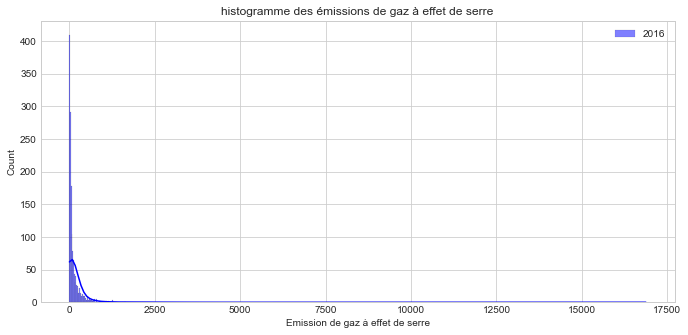

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


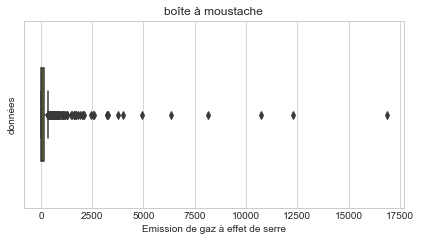

In [198]:
plt.figure(figsize = (25, 30))
plt.subplot(5,2,2)
plt.title("histogramme des émissions de gaz à effet de serre")
sns.histplot(data_2016["TotalGHGEmissions"], kde = True, color= "b", label ="2016")
plt.legend()
plt.xlabel("Emission de gaz à effet de serre")
plt.show()

plt.figure(figsize = (15, 20))
plt.subplot(5,2,1)
sns.boxplot(data_2016["TotalGHGEmissions"], width=0.5, color="y")
plt.title("boîte à moustache")
plt.xlabel("Emission de gaz à effet de serre")
plt.ylabel("données")
plt.show()

### Variable "GHGEmissionsIntensity"

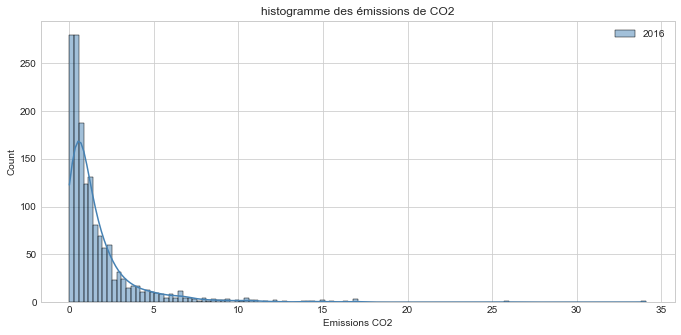

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


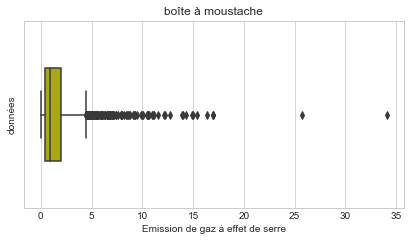

In [199]:
plt.figure(figsize = (25, 30))
plt.subplot(5,2,2)
plt.title("histogramme des émissions de CO2")
sns.histplot(data_2016["GHGEmissionsIntensity"], kde = True, color= "steelblue", label ="2016")
plt.legend()
plt.xlabel("Emissions CO2")
plt.show()

plt.figure(figsize = (15, 20))
plt.subplot(5,2,1)
sns.boxplot(data_2016["GHGEmissionsIntensity"], width=0.5, color="y")
plt.title("boîte à moustache")
plt.xlabel("Emission de gaz à effet de serre")
plt.ylabel("données")
plt.show()

On va appliquer le logarithmique aux variables targets La spécification en log se justifie en particulier car la distribution de nos targets - variables dépendante (conditionnellement aux régresseurs) est très asymétrique. Et donc on veut avoir une distribution normale.

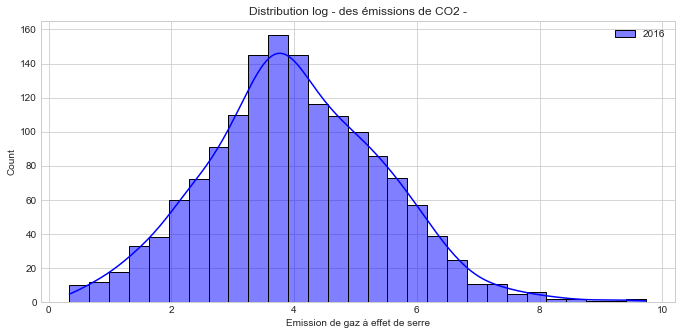

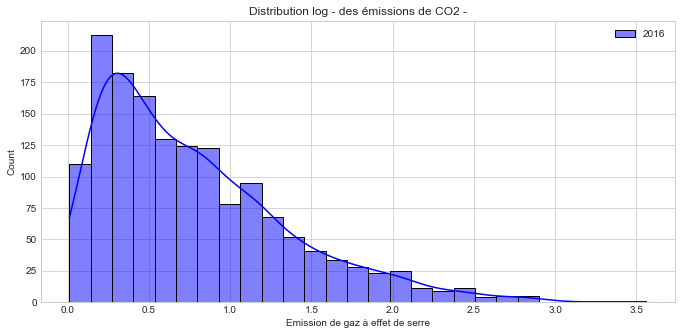

In [200]:
plt.figure(figsize = (25, 30))
plt.subplot(5,2,2)
plt.title("Distribution log - des émissions de CO2 -")
sns.histplot(np.log1p(data_2016["TotalGHGEmissions"]), kde = True, color= "b", label ="2016")
plt.legend()
plt.xlabel("Emission de gaz à effet de serre")
plt.show()

plt.figure(figsize = (25, 30))
plt.subplot(5,2,2)
plt.title("Distribution log - des émissions de CO2 -")
sns.histplot(np.log1p(data_2016["GHGEmissionsIntensity"]), kde = True, color= "b", label ="2016")
plt.legend()
plt.xlabel("Emission de gaz à effet de serre")
plt.show()

### Analyse des colonnes Consommation d'énergie

### Variable "SiteEnergyUseWN(kBtu)"

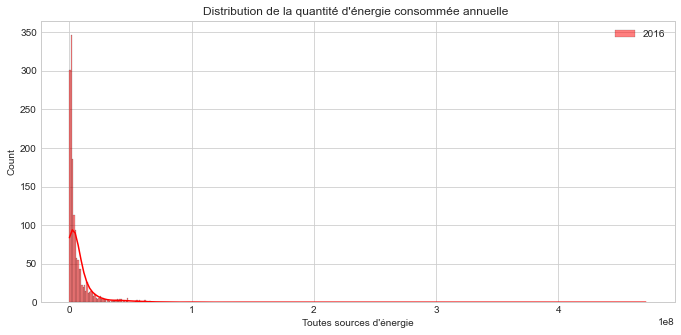

In [201]:
plt.figure(figsize = (25, 30))
plt.subplot(5,2,2)
plt.title("Distribution de la quantité d'énergie consommée annuelle ")
sns.histplot(data_2016["SiteEnergyUseWN(kBtu)"], kde = True, color= "r",label ="2016")
plt.legend()
plt.xlabel("Toutes sources d'énergie")
plt.show()

### Variable "SiteEUIWN(kBtu/sf)"

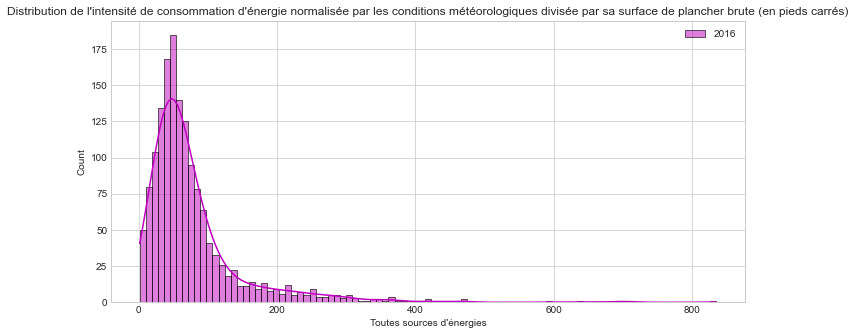

In [202]:
plt.figure(figsize = (25, 30))
plt.subplot(5,2,2)
plt.title("Distribution de l'intensité de consommation d'énergie normalisée par les conditions météorologiques divisée par sa surface de plancher brute (en pieds carrés)")
sns.histplot(data_2016["SiteEUIWN(kBtu/sf)"], kde = True, color= "m", label ="2016")
plt.legend()
plt.xlabel("Toutes sources d'énergies")
plt.show()

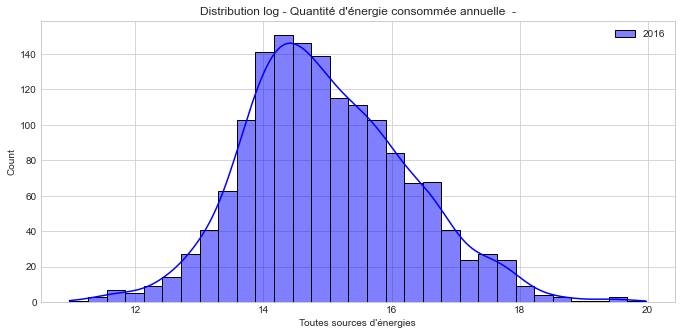

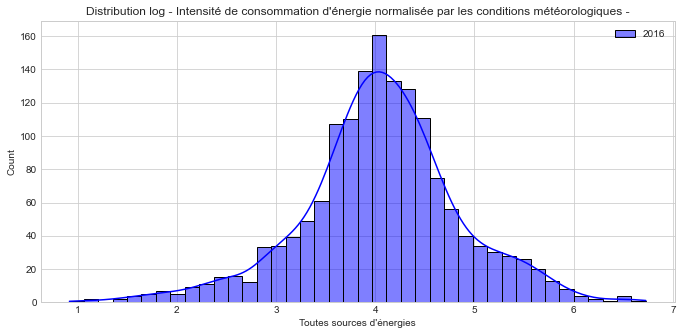

In [203]:
plt.figure(figsize = (25, 30))
plt.subplot(5,2,2)
plt.title("Distribution log - Quantité d'énergie consommée annuelle  -")
sns.histplot(np.log1p(data_2016["SiteEnergyUseWN(kBtu)"]), kde = True, color= "b", label ="2016")
plt.legend()
plt.xlabel("Toutes sources d'énergies")
plt.show()

plt.figure(figsize = (25, 30))
plt.subplot(5,2,2)
plt.title("Distribution log - Intensité de consommation d'énergie normalisée par les conditions météorologiques -")
sns.histplot(np.log1p(data_2016["SiteEUIWN(kBtu/sf)"]), kde = True, color= "b", label ="2016")
plt.legend()
plt.xlabel("Toutes sources d'énergies")
plt.show()

### Analyses statistiques

In [204]:
data_2016["SiteEUIWN(kBtu/sf)"].describe()

count    1536.000000
mean       77.938411
std        76.173782
min         1.500000
25%        37.275000
50%        56.350000
75%        88.300003
max       834.400024
Name: SiteEUIWN(kBtu/sf), dtype: float64

In [205]:
np.log1p(data_2016["SiteEUIWN(kBtu/sf)"]).describe()

count    1536.000000
mean        4.057086
std         0.794618
min         0.916291
25%         3.644796
50%         4.049172
75%         4.492002
max         6.727911
Name: SiteEUIWN(kBtu/sf), dtype: float64

In [206]:
data_2016["SiteEnergyUseWN(kBtu)"].describe()

count    1.536000e+03
mean     8.493919e+06
std      2.284779e+07
min      5.811420e+04
25%      1.336338e+06
50%      2.830662e+06
75%      7.541073e+06
max      4.716139e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [207]:
np.log1p(data_2016["SiteEnergyUseWN(kBtu)"]).describe()

count    1536.000000
mean       14.997920
std         1.286482
min        10.970183
25%        14.105442
50%        14.856022
75%        15.835875
max        19.971671
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [208]:
data_2016["TotalGHGEmissions"].describe()

count     1537.000000
mean       186.659453
std        729.929635
min          0.400000
25%         20.660000
50%         49.900000
75%        146.930000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [209]:
np.log1p(data_2016["TotalGHGEmissions"]).describe()

count    1537.000000
mean        4.025847
std         1.442267
min         0.336472
25%         3.075467
50%         3.929863
75%         4.996739
max         9.733410
Name: TotalGHGEmissions, dtype: float64

In [210]:
data_2016["GHGEmissionsIntensity"].describe()

count    1537.000000
mean        1.673448
std         2.414360
min         0.010000
25%         0.360000
50%         0.890000
75%         1.980000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [211]:
np.log1p(data_2016["GHGEmissionsIntensity"]).describe()

count    1537.000000
mean        0.773579
std         0.579502
min         0.009950
25%         0.307485
50%         0.636577
75%         1.091923
max         3.557916
Name: GHGEmissionsIntensity, dtype: float64

### Corrélation entre les variables liées à la consommation d'énergie et celles liées à l'émission de gaz à effet de serre, notamment le CO2

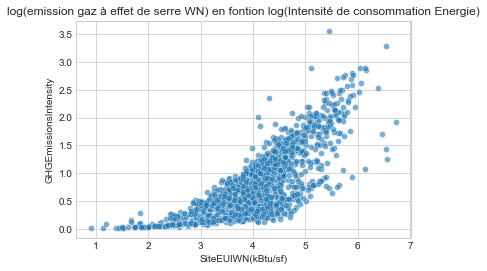

In [212]:
plt.title('log(emission gaz à effet de serre WN) en fontion log(Intensité de consommation Energie)')
sns.scatterplot(x=np.log1p(data_2016["SiteEUIWN(kBtu/sf)"]), y= np.log1p(data_2016["GHGEmissionsIntensity"]), alpha= 0.6 )
plt.show()

In [213]:
data_2016["SiteEUIWN(kBtu/sf)"].corr(data_2016["GHGEmissionsIntensity"])

0.7295184298866456

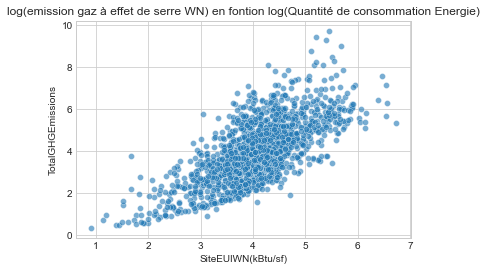

In [214]:
plt.title('log(emission gaz à effet de serre WN) en fontion log(Quantité de consommation Energie)')
sns.scatterplot(x=np.log1p(data_2016["SiteEUIWN(kBtu/sf)"]), y= np.log1p(data_2016["TotalGHGEmissions"]), alpha= 0.6 )
plt.show()

In [215]:
data_2016["SiteEUIWN(kBtu/sf)"].corr(data_2016["TotalGHGEmissions"])

0.27098807164791805

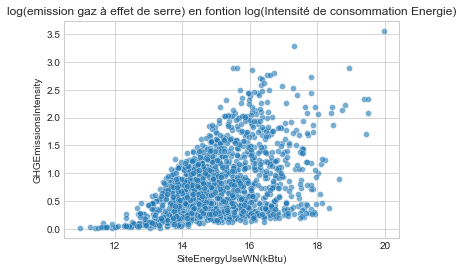

In [216]:
plt.title('log(emission gaz à effet de serre) en fontion log(Intensité de consommation Energie)')
sns.scatterplot(x=np.log1p(data_2016["SiteEnergyUseWN(kBtu)"]), y= np.log1p(data_2016["GHGEmissionsIntensity"]), alpha= 0.6 )
plt.show()

In [217]:
data_2016["SiteEnergyUseWN(kBtu)"].corr(data_2016["GHGEmissionsIntensity"])

0.4241739778000604

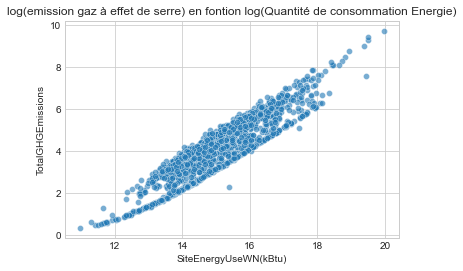

In [218]:
plt.title('log(emission gaz à effet de serre) en fontion log(Quantité de consommation Energie)')
sns.scatterplot(x=np.log1p(data_2016["SiteEnergyUseWN(kBtu)"]), y= np.log1p(data_2016["TotalGHGEmissions"]), alpha= 0.6 )
plt.show()

In [219]:
data_2016["SiteEnergyUseWN(kBtu)"].corr(data_2016["TotalGHGEmissions"])

0.9215639855796426

On constate une forte corrélation entre les variables "SiteEnergyUseWN(kBtu)" et "TotalGHGEmissions" (0,92) et les variables "SiteEUIWN(kBtu/sf)" et "GHGEmissionsIntensity" (0,73)

### Analyse des variables continues

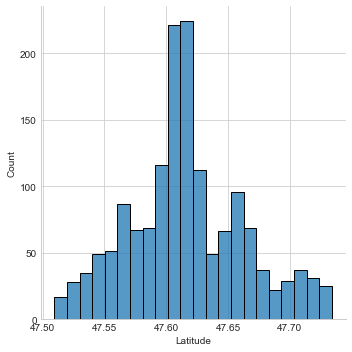

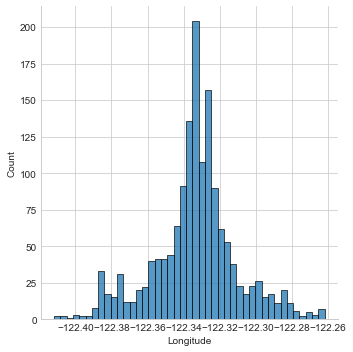

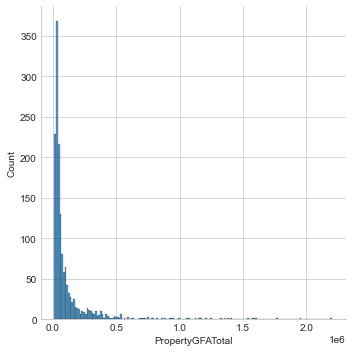

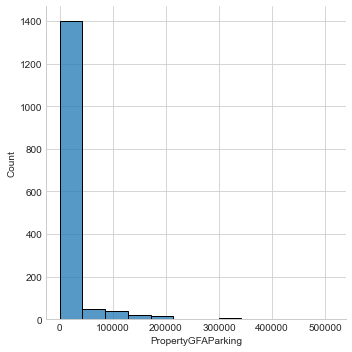

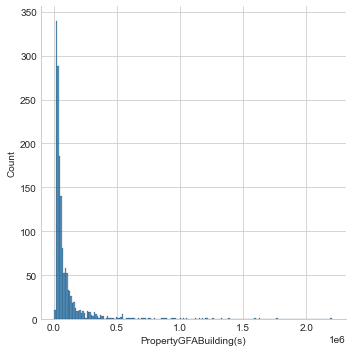

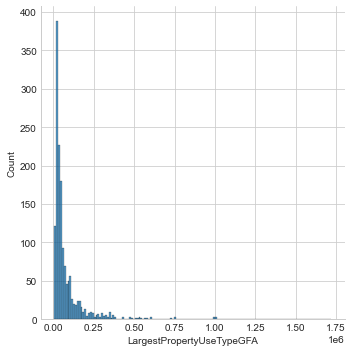

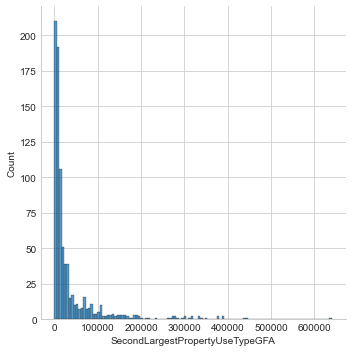

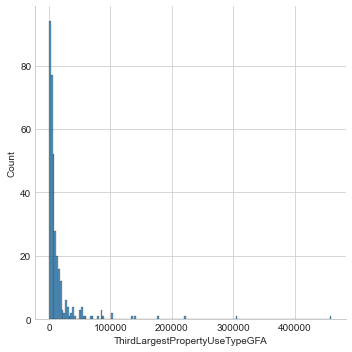

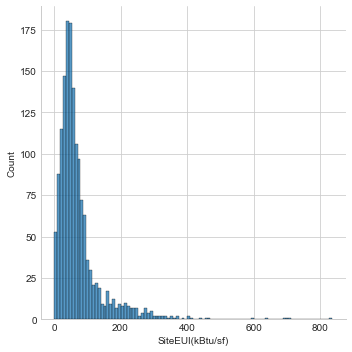

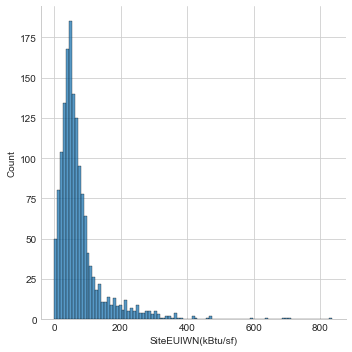

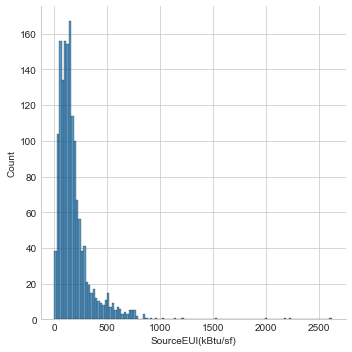

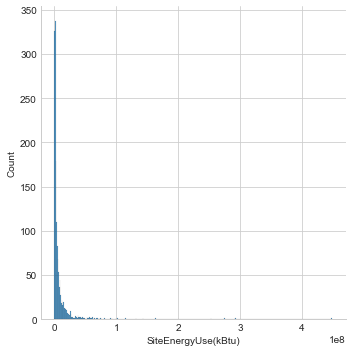

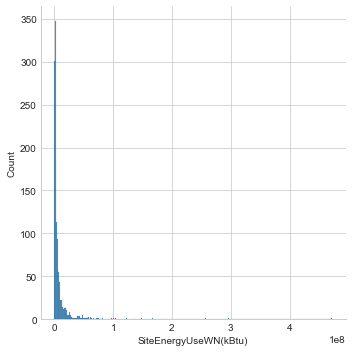

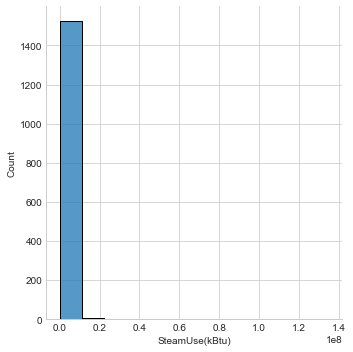

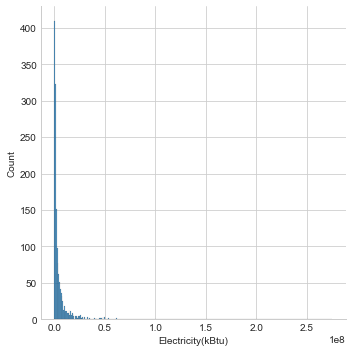

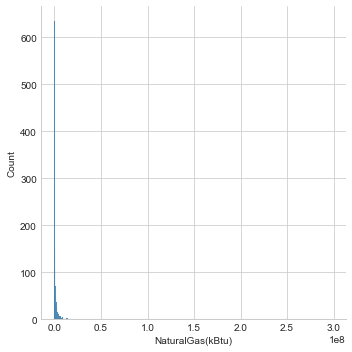

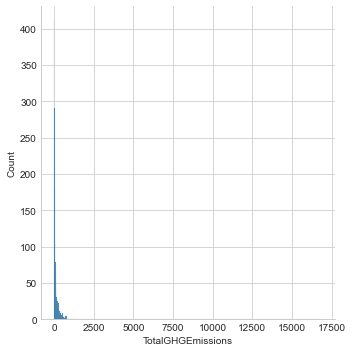

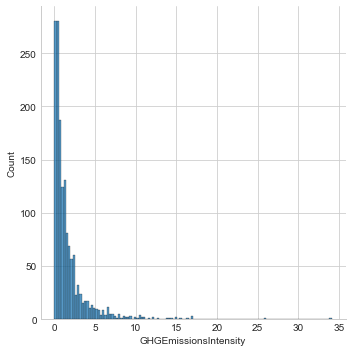

In [220]:
for col in data_2016.select_dtypes('float64'):
    sns.displot(data=data_2016[col])

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


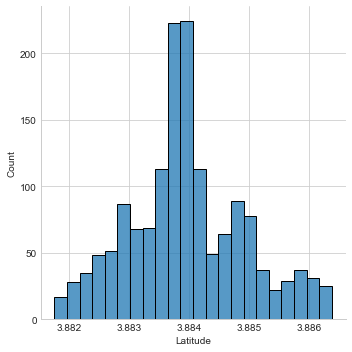

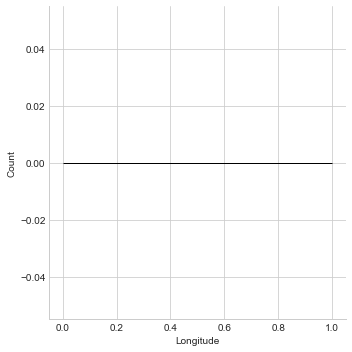

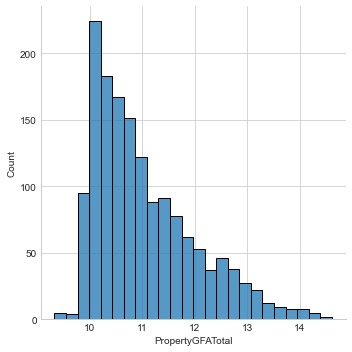

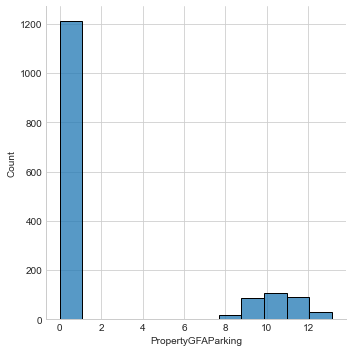

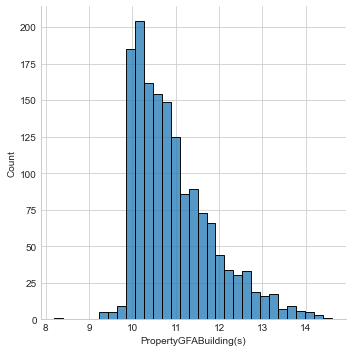

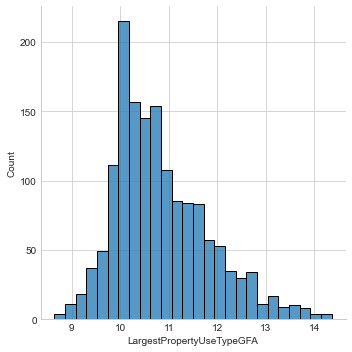

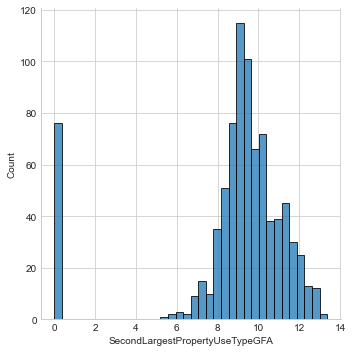

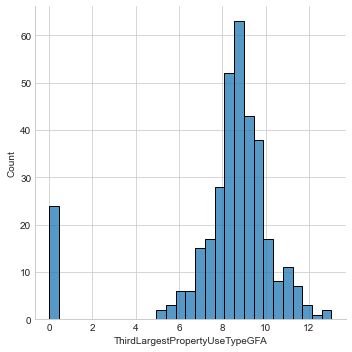

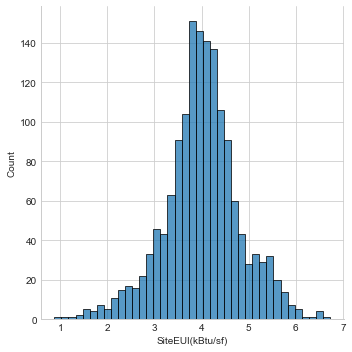

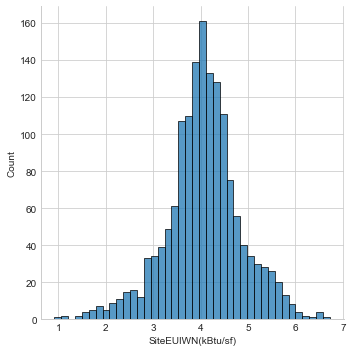

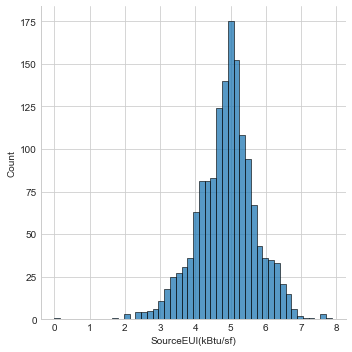

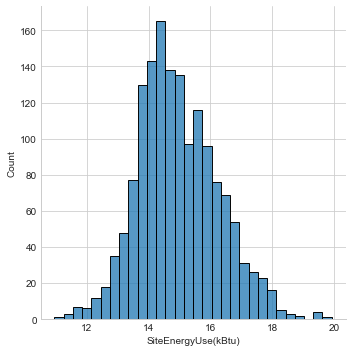

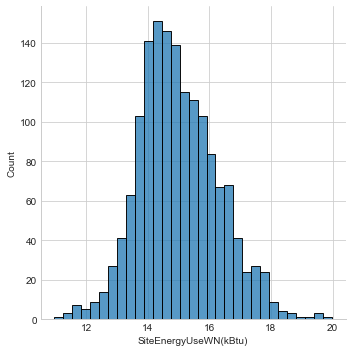

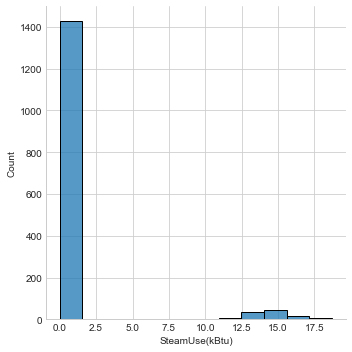

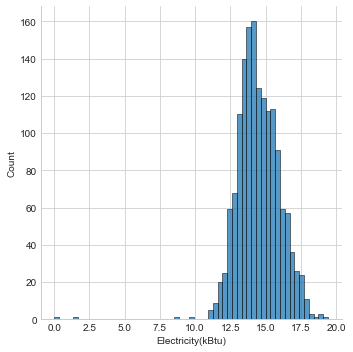

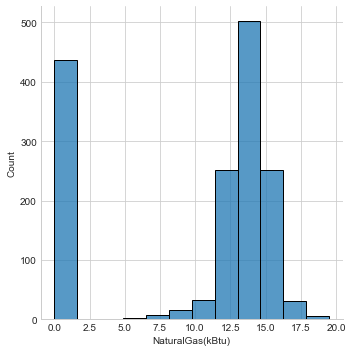

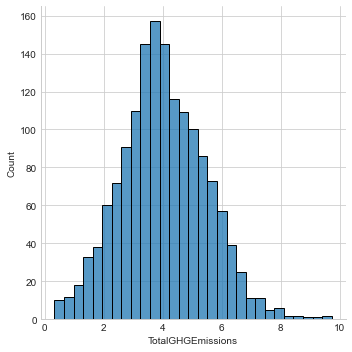

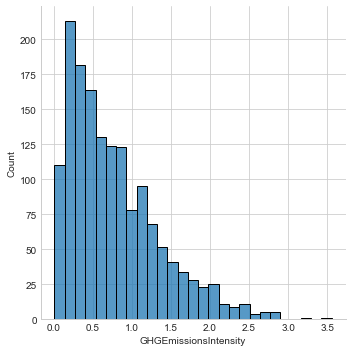

In [221]:
#on transforme les variables par le logarithmique
for col in data_2016.select_dtypes('float64'):
    sns.displot(data=np.log1p(data_2016[col]))

### Analyse des variables discrètes

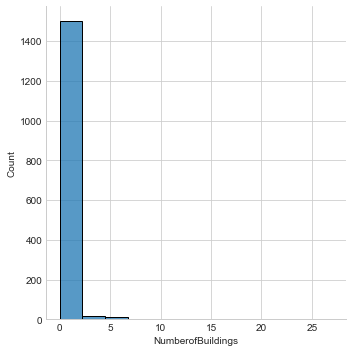

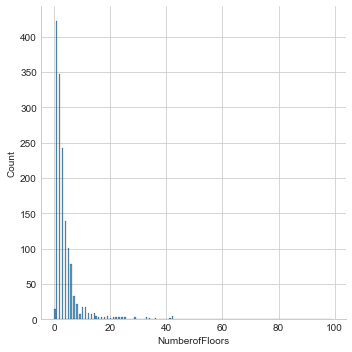

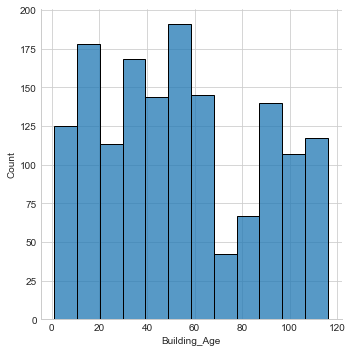

In [222]:
for col in data_2016.select_dtypes("int64"):
    sns.displot(data=data_2016[col])

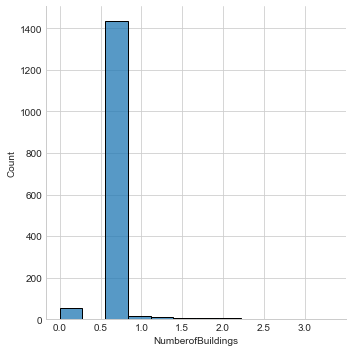

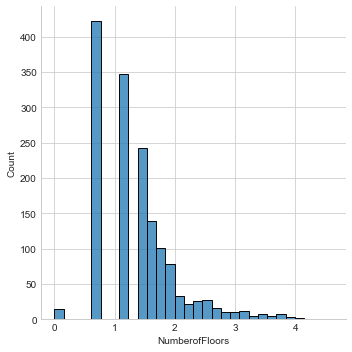

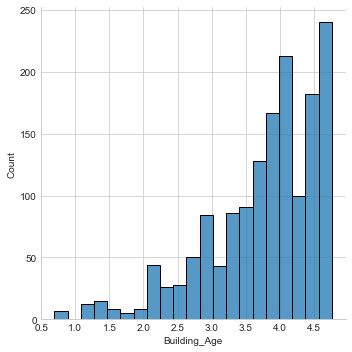

In [223]:
for col in data_2016.select_dtypes("int64"):
    sns.displot(data=np.log1p(data_2016[col]))

### Analyse des variables qualitatives

In [224]:
for col in data_2016.select_dtypes("object"):
    print(f'{col :-<50} {data_2016[col].unique()}\n')

OSEBuildingID------------------------------------- [1 2 3 ... 50224 50225 50226]

DataYear------------------------------------------ [2016]

BuildingType-------------------------------------- ['NonResidential' 'Nonresidential COS' 'Campus' 'SPS-District K-12'
 'Nonresidential WA']

PrimaryPropertyType------------------------------- ['Hotel' 'Other' 'Mixed Use Property' 'University'
 'Small- and Mid-Sized Office' 'Self-Storage Facility' 'Warehouse'
 'K-12 School' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Supermarket / Grocery Store' 'Laboratory'
 'Refrigerated Warehouse' 'Restaurant' 'Low-Rise Multifamily']

PropertyName-------------------------------------- ['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center']

Address------------------------------------------- ['405 Olive way' '724 Pine s

In [225]:
data_2016['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    284
Other                          245
Warehouse                      185
Large Office                   166
Mixed Use Property             113
Retail Store                    85
Hotel                           75
Worship Facility                67
Distribution Center             53
K-12 School                     50
Supermarket / Grocery Store     39
Medical Office                  39
Self-Storage Facility           28
Residence Hall                  21
University                      21
Senior Care Community           20
Restaurant                      12
Refrigerated Warehouse          12
Laboratory                      10
Hospital                        10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

In [226]:
#On écarte les bâtiments  destinés à l’habitation.
data_2016.drop(index = data_2016[data_2016["PrimaryPropertyType"]=="Low-Rise Multifamily"].index, inplace=True)

In [227]:
data_2016["PropertyName"].value_counts()

Airport Way                                                   2
Canal Building                                                2
South Park                                                    2
Bayview Building                                              2
Marriott Springhill Suites (33)                               1
                                                             ..
VM Seattle Hospital & Medical Center - Jones Pavilion         1
(ID25461) CHINA HARBOR RESTURANT & MARINA                     1
Holy Names Academy                                            1
Seattle Children's Hospital Odessa Brown Children's Clinic    1
Ding How Shopping Center                                      1
Name: PropertyName, Length: 1531, dtype: int64

In [228]:
data_2016["ZipCode"].value_counts()

98134    180
98104    152
98101    141
98109    138
98108    111
98122     85
98121     83
98105     79
98103     62
98119     58
98133     48
98107     47
98125     45
98144     42
98115     39
98118     32
98102     24
98106     22
98199     21
98126     18
98116     18
98112     17
98117     14
98195      7
98136      5
98155      4
98168      2
98124      2
98178      2
98013      2
98177      2
98146      2
98154      2
98111      2
98185      1
98006      1
98020      1
98011      1
98191      1
98053      1
98181      1
98165      1
98164      1
98145      1
98070      1
98114      1
98113      1
98033      1
Name: ZipCode, dtype: int64

In [229]:
data_2016["Neighborhood"].value_counts()

DOWNTOWN                  347
GREATER DUWAMISH          328
MAGNOLIA / QUEEN ANNE     142
LAKE UNION                142
EAST                      116
NORTHEAST                 113
NORTHWEST                  74
BALLARD                    58
NORTH                      51
CENTRAL                    41
DELRIDGE                   36
SOUTHWEST                  31
SOUTHEAST                  31
North                       8
Ballard                     5
Central                     4
Delridge                    4
Northwest                   3
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [230]:
data_2016["YearBuilt"].value_counts()

1900    42
1970    31
1979    28
1960    28
2000    28
        ..
1944     2
1901     2
1903     1
1936     1
1935     1
Name: YearBuilt, Length: 113, dtype: int64

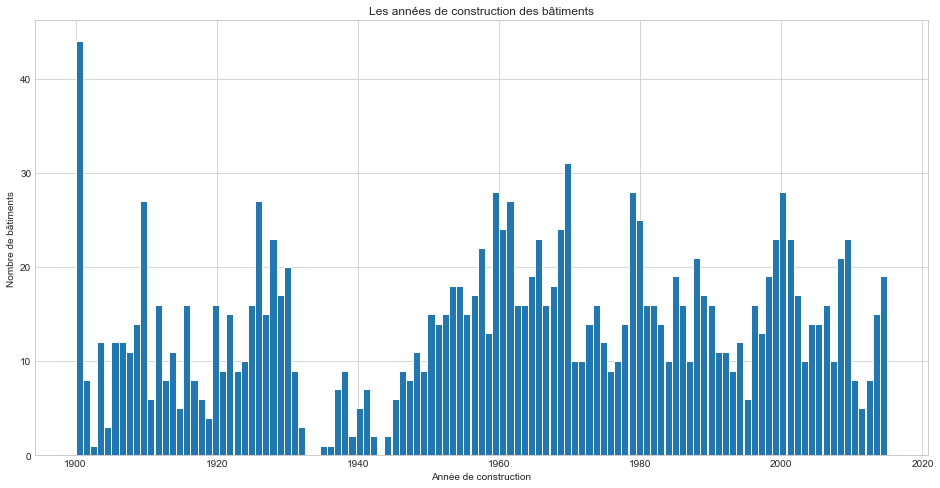

In [231]:
plt.figure(figsize=(16,8))
plt.title("Les années de construction des bâtiments")
plt.xlabel("Année de construction")
plt.ylabel("Nombre de bâtiments")
plt.hist(data_2016["YearBuilt"], 113, width = 1, edgecolor = 'white')
plt.show()

In [232]:
data_2016["ListOfAllPropertyUseTypes"].value_counts()

Office                                                                                                                                                                130
Office, Parking                                                                                                                                                       116
Non-Refrigerated Warehouse                                                                                                                                            100
Non-Refrigerated Warehouse, Office                                                                                                                                     61
Other                                                                                                                                                                  58
                                                                                                                                                      

In [233]:
#On écarte les bâtiments  destinés à l’habitation.
data_2016.drop(index = data_2016[data_2016["ListOfAllPropertyUseTypes"]=="Multifamily Housing"].index, inplace=True)

In [234]:
data_2016["LargestPropertyUseType"].value_counts()

Office                                                  480
Non-Refrigerated Warehouse                              197
Other                                                    95
Retail Store                                             93
Hotel                                                    75
Worship Facility                                         67
Distribution Center                                      54
K-12 School                                              50
Medical Office                                           41
Supermarket/Grocery Store                                40
Other - Recreation                                       31
Parking                                                  30
Self-Storage Facility                                    27
Residence Hall/Dormitory                                 22
Other - Entertainment/Public Assembly                    21
College/University                                       21
Senior Care Community                   

In [235]:
#On écarte les bâtiments  destinés à l’habitation.
data_2016.drop(index = data_2016[data_2016["LargestPropertyUseType"]=="Multifamily Housing"].index, inplace=True)

In [236]:
data_2016["SecondLargestPropertyUseType"].value_counts()

Parking                                                 326
Office                                                  165
Retail Store                                             81
Other                                                    43
Restaurant                                               29
Non-Refrigerated Warehouse                               28
Fitness Center/Health Club/Gym                           16
Data Center                                              12
Multifamily Housing                                      12
Other - Services                                         11
Medical Office                                            8
Laboratory                                                8
Bank Branch                                               7
Distribution Center                                       7
Supermarket/Grocery Store                                 7
Other - Entertainment/Public Assembly                     6
K-12 School                             

In [237]:
#On écarte les bâtiments  destinés à l’habitation.
data_2016.drop(index = data_2016[data_2016["SecondLargestPropertyUseType"]=="Multifamily Housing"].index, inplace=True)

In [238]:
data_2016["ThirdLargestPropertyUseType"].value_counts()

Office                                                  49
Retail Store                                            44
Other                                                   38
Parking                                                 37
Restaurant                                              27
Non-Refrigerated Warehouse                              14
Data Center                                             13
Multifamily Housing                                     12
Swimming Pool                                           10
Medical Office                                           9
Pre-school/Daycare                                       8
Food Service                                             8
Social/Meeting Hall                                      7
Other - Restaurant/Bar                                   5
Fitness Center/Health Club/Gym                           4
Bank Branch                                              4
Other - Entertainment/Public Assembly                   

In [239]:
#On écarte les bâtiments  destinés à l’habitation.
data_2016.drop(index = data_2016[data_2016["ThirdLargestPropertyUseType"]=="Multifamily Housing"].index, inplace=True)

In [240]:
data_2016["YearsENERGYSTARCertified"].value_counts()

2016                    11
2017                     5
2013                     4
2009                     4
20172016                 3
                        ..
201520142013             1
201620152012             1
2016201120102009         1
20162015201420122008     1
2016201520122009         1
Name: YearsENERGYSTARCertified, Length: 63, dtype: int64

In [241]:
data_2016["ENERGYSTARScore"].value_counts()

100    27
98     27
95     25
89     24
96     22
       ..
24      3
28      3
39      3
46      3
11      3
Name: ENERGYSTARScore, Length: 100, dtype: int64

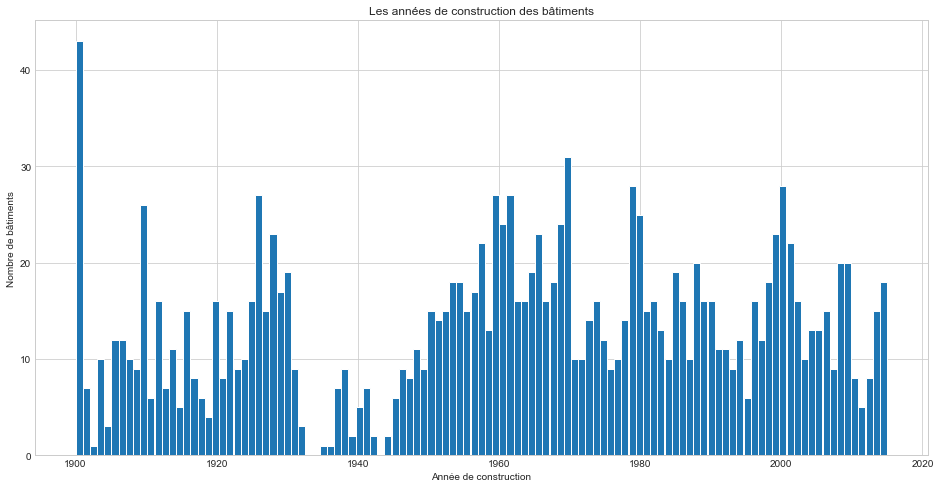

In [242]:
plt.figure(figsize=(16,8))
plt.title("Les années de construction des bâtiments")
plt.xlabel("Année de construction")
plt.ylabel("Nombre de bâtiments")
plt.hist(data_2016["YearBuilt"], 113, width = 1, edgecolor = 'white')
plt.show()

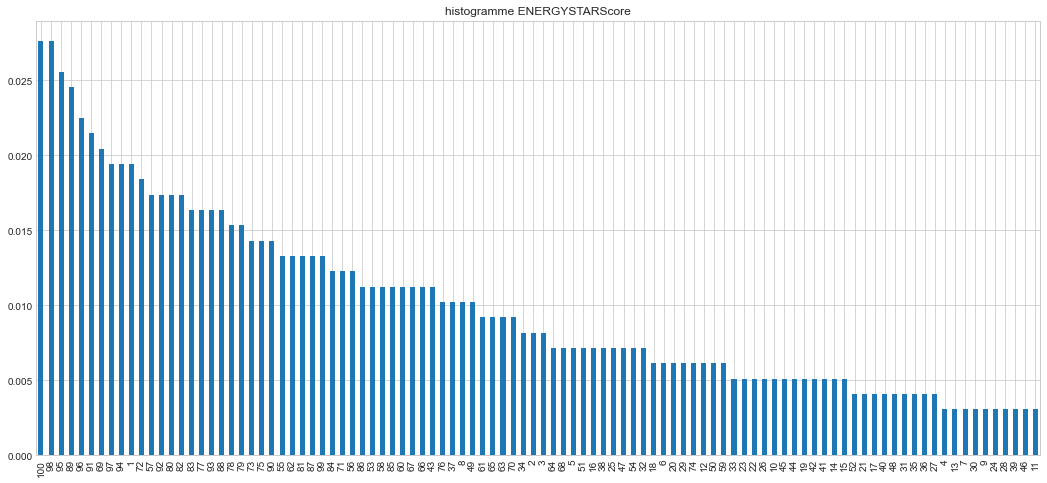

In [243]:
plt.figure(figsize=(18,8))
plt.title("histogramme ENERGYSTARScore")
data_2016["ENERGYSTARScore"].value_counts(normalize=True).plot(kind='bar')
plt.show()

### Analyse des differentes sources d'énergies

In [244]:
col_nrj = ["SteamUse(kBtu)", "Electricity(kBtu)", "NaturalGas(kBtu)"]
data_2016[col_nrj].head()
data_2016["source_nrj"] = data_2016[col_nrj].apply(sum,axis=1)
col_nrj.append("source_nrj")
col_nrj.append("SiteEnergyUse(kBtu)")
col_nrj.append("SiteEnergyUseWN(kBtu)")
data_2016[col_nrj].head()

,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),source_nrj,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu)
0,2003882.00,3946027.0,1276453.0,7226362.00,7226362.5,7456910.0
1,0.00,3242851.0,5145082.0,8387933.00,8387933.0,8664479.0
2,21566554.00,49526664.0,1493800.0,72587018.00,72587024.0,73937112.0
3,2214446.25,2768924.0,1811213.0,6794583.25,6794584.0,6946800.5
4,0.00,5368607.0,8803998.0,14172605.00,14172606.0,14656503.0


En additionnant les 3 variables ("SteamUse(kBtu)", "Electricity(kBtu)" et "NaturalGas(kBtu)"), on constate que la somme correspond  aux données de la variable "SiteEnergyUse(kBtu)" et correspond environ à la variable "SiteEnergyUseWN(kBtu)". Donc ce sont les 3 principales sources d'énergies liées aux émissions de gaz à effet de serre (notamment le CO2). Vu que ces 3 variables ("SteamUse(kBtu)", "Electricity(kBtu)" et "NaturalGas(kBtu)") sont directement liées (par définition) aux variables "SiteEnergyUse(kBtu)" et "SiteEnergyUseWN(kBtu)", je ne vais pas les garder dans mon dataset pour la prédiction des targets, car ils risquent de fausser les scores.

La proportion de Vapeur dans la consommation d'énergie totale:754474985.83228 kBtu      soit 6.045618509869369 %
La proportion d'Electricité dans la consommation d'énergie totale:8593078357.5945 kBtu  soit 68.85645588120238 %
La proportion de Gaz dans la consommation d'énergie totale:3103399661.0154 kBtu         soit 24.867584461345967 %


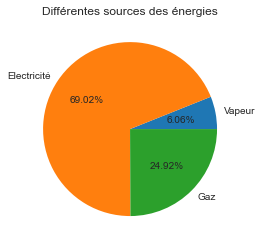

In [245]:
somme_vap   = data_2016["SteamUse(kBtu)"].sum()
somme_elec  = data_2016["Electricity(kBtu)"].sum()
somme_gaz   = data_2016["NaturalGas(kBtu)"].sum()
somme_total = data_2016["SiteEnergyUse(kBtu)"].sum()
print(f"La proportion de Vapeur dans la consommation d'énergie totale:{somme_vap} kBtu      soit {somme_vap/somme_total*100} %")
print(f"La proportion d'Electricité dans la consommation d'énergie totale:{somme_elec} kBtu  soit {somme_elec/somme_total*100} %")
print(f"La proportion de Gaz dans la consommation d'énergie totale:{somme_gaz} kBtu         soit {somme_gaz/somme_total*100} %")

plt.title("Différentes sources des énergies")
plt.pie([somme_vap,somme_elec,somme_gaz], labels = ["Vapeur","Electricité","Gaz"], \
        autopct = lambda x: str(round(x, 2)) + '%')
plt.show()

La principale source d'énergie est l'électricité à 69% et le gaz, en second, à presque 25%.

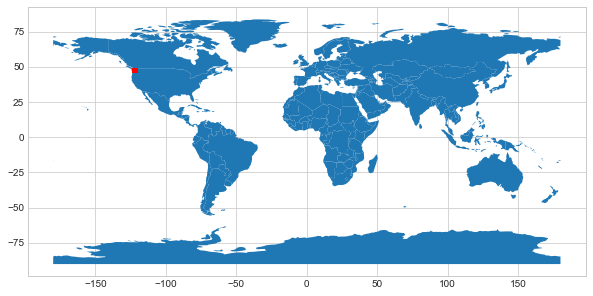

In [246]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
geometry = [Point(xy) for xy in zip(data_2016['Longitude'], data_2016['Latitude'])]
gdf = GeoDataFrame(data_2016, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

### La localisation du bâtiment par rapport à son âge

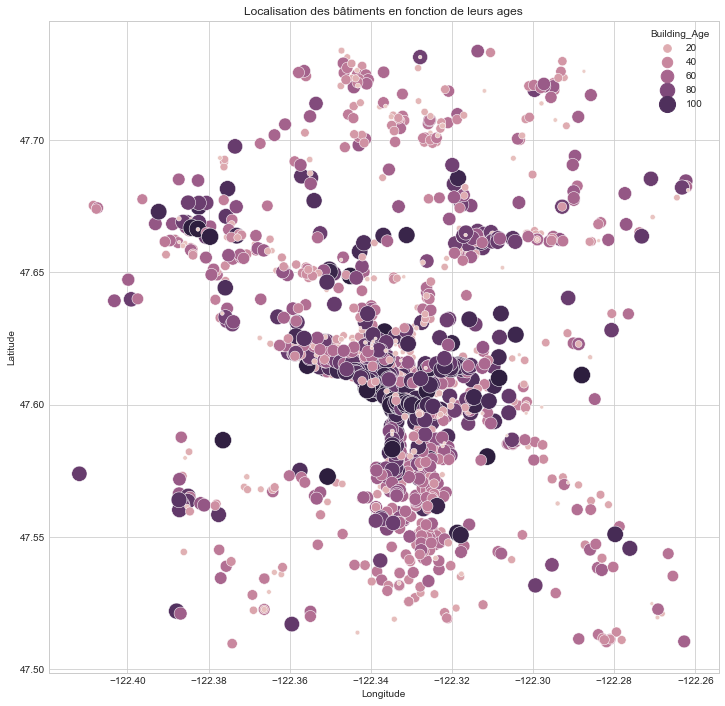

In [247]:
plt.figure(figsize=(12,12))
plt.title("Localisation des bâtiments en fonction de leurs ages")
sns.scatterplot(x="Longitude", y="Latitude", data = data_2016, hue="Building_Age", size="Building_Age", sizes=(10, 300))
plt.show()

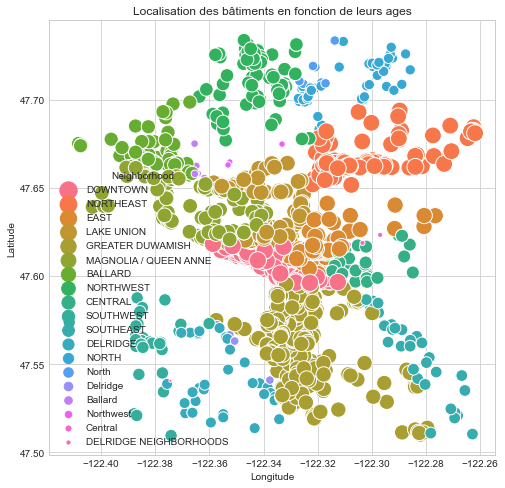

In [248]:
#localisation des bâtiments par quartier
plt.figure(figsize=(8,8))
plt.title("Localisation des bâtiments en fonction de leurs ages")
sns.scatterplot(x="Longitude", y="Latitude", data = data_2016, hue="Neighborhood", size="Neighborhood", sizes=(10, 300))
#plt.savefig("p4_01_local_neighborhood.jpg")
plt.show()

### La localisation du bâtiment par rapport à son type d'utilisation

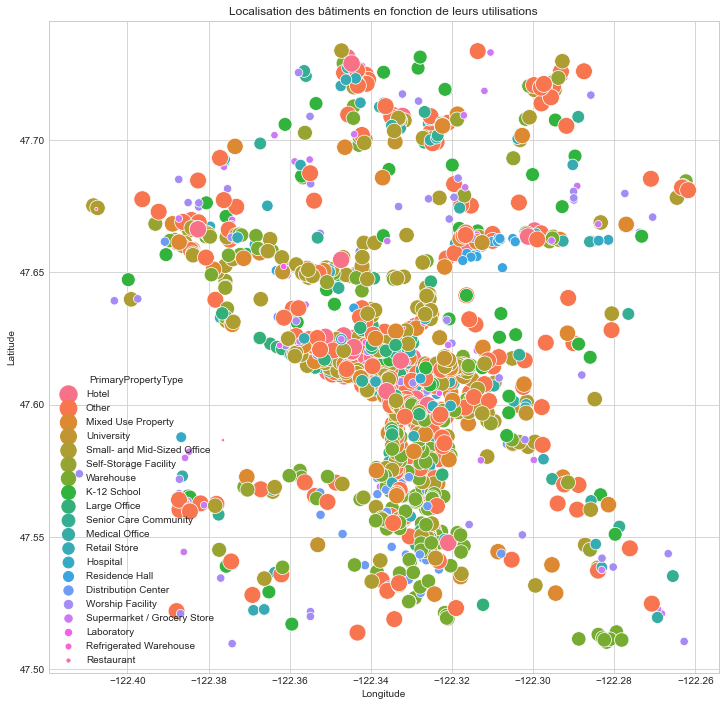

In [249]:
plt.figure(figsize=(12,12))
plt.title("Localisation des bâtiments en fonction de leurs utilisations")
sns.scatterplot(x="Longitude", y="Latitude", data = data_2016, hue="PrimaryPropertyType", size="PrimaryPropertyType", sizes=(10, 300))
plt.show()

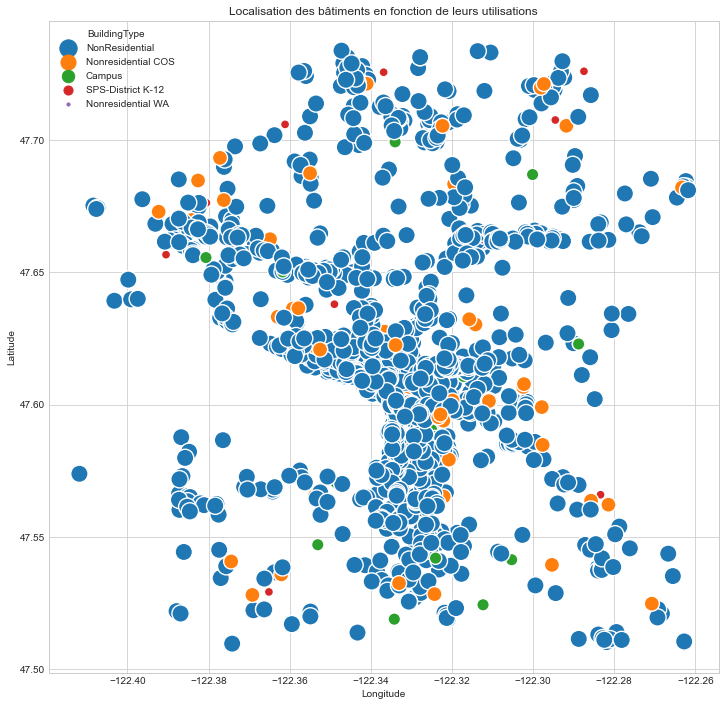

In [250]:
plt.figure(figsize=(12,12))
plt.title("Localisation des bâtiments en fonction de leurs utilisations")
sns.scatterplot(x="Longitude", y="Latitude", data = data_2016, hue="BuildingType", size="BuildingType", sizes=(10, 300))
plt.show()

### La localisation du bâtiment par rapport à ses émission de gaz à effet de serre

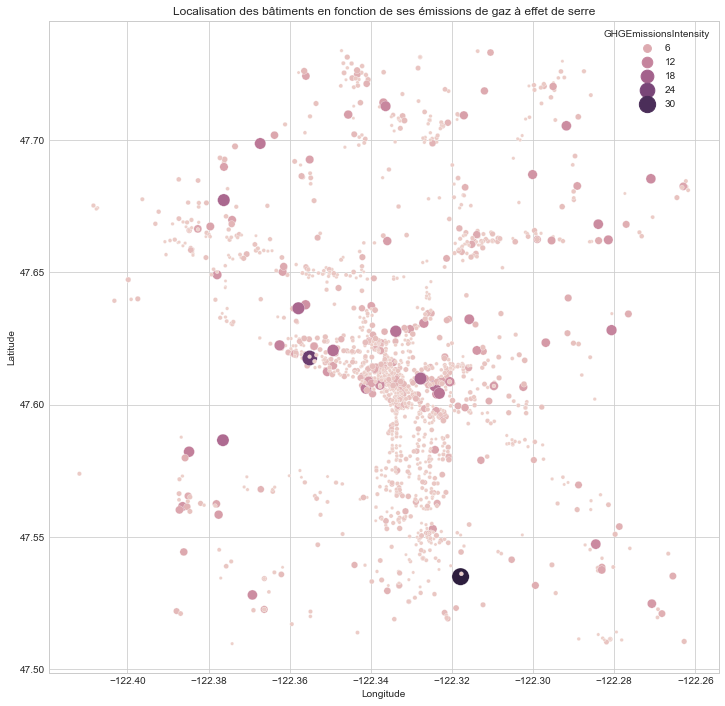

In [251]:
plt.figure(figsize=(12,12))
plt.title("Localisation des bâtiments en fonction de ses émissions de gaz à effet de serre")
sns.scatterplot(x="Longitude", y="Latitude", data = data_2016, hue="GHGEmissionsIntensity", size="GHGEmissionsIntensity", sizes=(10, 300))
plt.show()

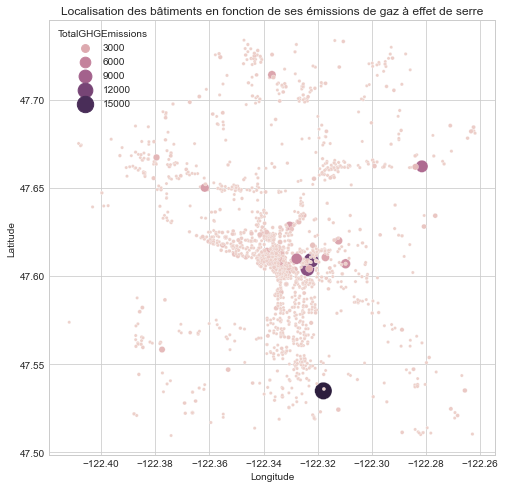

In [276]:
plt.figure(figsize=(8,8))
plt.title("Localisation des bâtiments en fonction de ses émissions de gaz à effet de serre")
sns.scatterplot(x="Longitude", y="Latitude", data = data_2016, hue="TotalGHGEmissions", size="TotalGHGEmissions", sizes=(10, 300))
plt.show()

### La localisation du bâtiment par rapport à ses consommations d'énergie

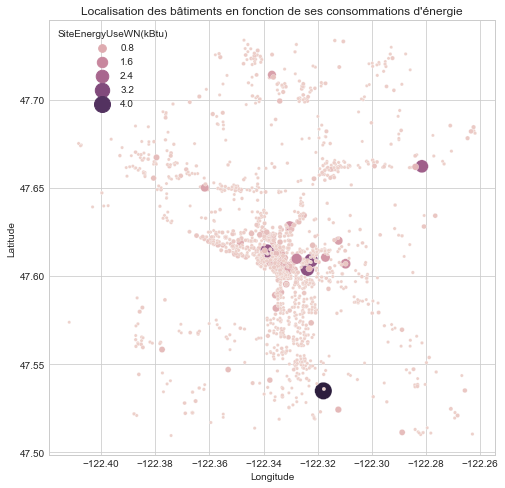

In [275]:
plt.figure(figsize=(8,8))
plt.title("Localisation des bâtiments en fonction de ses consommations d'énergie")
sns.scatterplot(x="Longitude", y="Latitude", data = data_2016, hue="SiteEnergyUseWN(kBtu)", size="SiteEnergyUseWN(kBtu)", sizes=(10, 300))
plt.show()

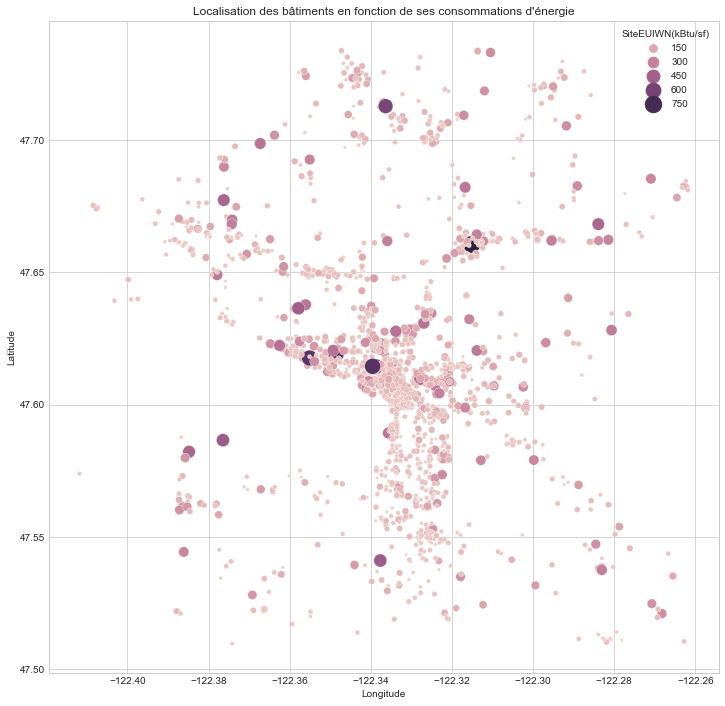

In [254]:
plt.figure(figsize=(12,12))
plt.title("Localisation des bâtiments en fonction de ses consommations d'énergie")
sns.scatterplot(x="Longitude", y="Latitude", data = data_2016, hue="SiteEUIWN(kBtu/sf)", size="SiteEUIWN(kBtu/sf)", sizes=(10, 300))
plt.show()

In [255]:
data_2016.dtypes

OSEBuildingID                        object
DataYear                             object
BuildingType                         object
PrimaryPropertyType                  object
PropertyName                         object
Address                              object
ZipCode                              object
Neighborhood                         object
Latitude                            float64
Longitude                           float64
YearBuilt                            object
NumberofBuildings                     Int64
NumberofFloors                        int64
PropertyGFATotal                    float64
PropertyGFAParking                  float64
PropertyGFABuilding(s)              float64
ListOfAllPropertyUseTypes            object
LargestPropertyUseType               object
LargestPropertyUseTypeGFA           float64
SecondLargestPropertyUseType         object
SecondLargestPropertyUseTypeGFA     float64
ThirdLargestPropertyUseType          object
ThirdLargestPropertyUseTypeGFA  

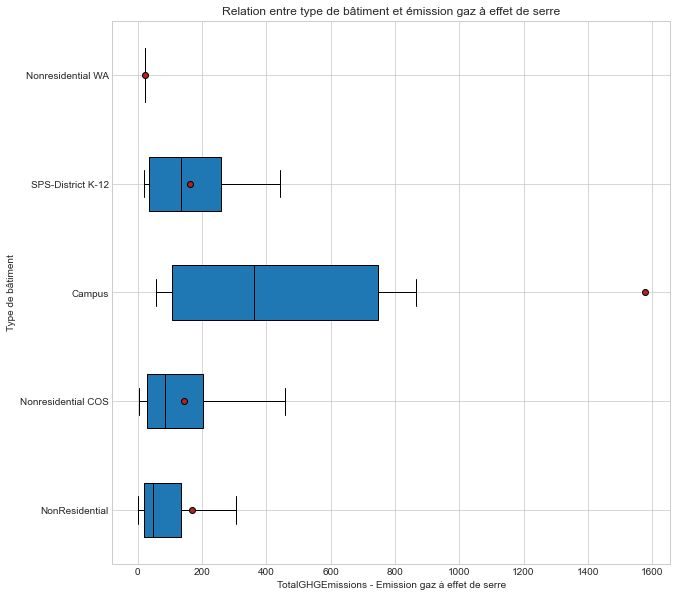

In [256]:
X = "BuildingType" # qualitative
Y = "TotalGHGEmissions" # quantitative

type_batiment = data_2016.copy()
modalites = type_batiment[X].unique()
groupes = []
for m in modalites:
    groupes.append(type_batiment[type_batiment[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure(figsize=(10,10))
plt.title("Relation entre type de bâtiment et émission gaz à effet de serre")
plt.xlabel("TotalGHGEmissions - Emission gaz à effet de serre")  
plt.ylabel("Type de bâtiment")    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

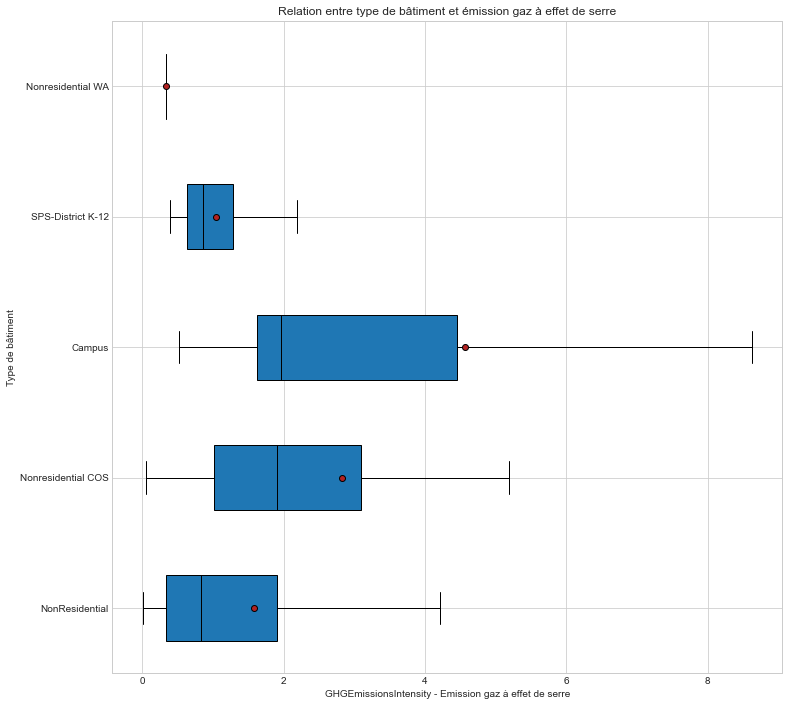

In [257]:
X = "BuildingType" # qualitative
Y = "GHGEmissionsIntensity" # quantitative

type_batiment = data_2016.copy()
modalites = type_batiment[X].unique()
groupes = []
for m in modalites:
    groupes.append(type_batiment[type_batiment[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure(figsize=(12,12))
plt.title("Relation entre type de bâtiment et émission gaz à effet de serre")
plt.xlabel("GHGEmissionsIntensity - Emission gaz à effet de serre")  
plt.ylabel("Type de bâtiment")    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

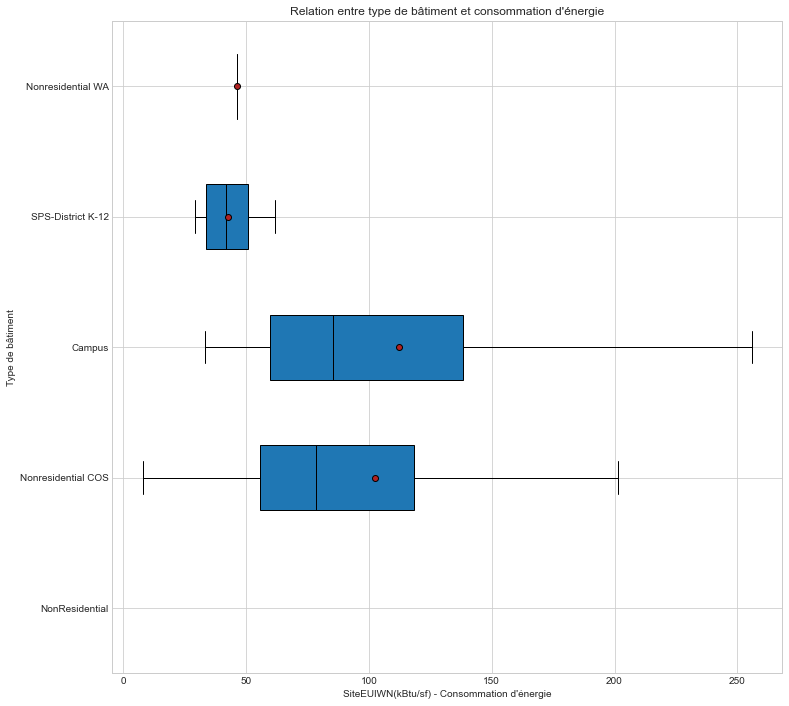

In [258]:
X = "BuildingType" # qualitative
Y = "SiteEUIWN(kBtu/sf)" # quantitative

type_batiment = data_2016.copy()
modalites = type_batiment[X].unique()
groupes = []
for m in modalites:
    groupes.append(type_batiment[type_batiment[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure(figsize=(12,12))
plt.title("Relation entre type de bâtiment et consommation d'énergie")
plt.xlabel("SiteEUIWN(kBtu/sf) - Consommation d'énergie")  
plt.ylabel("Type de bâtiment")    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

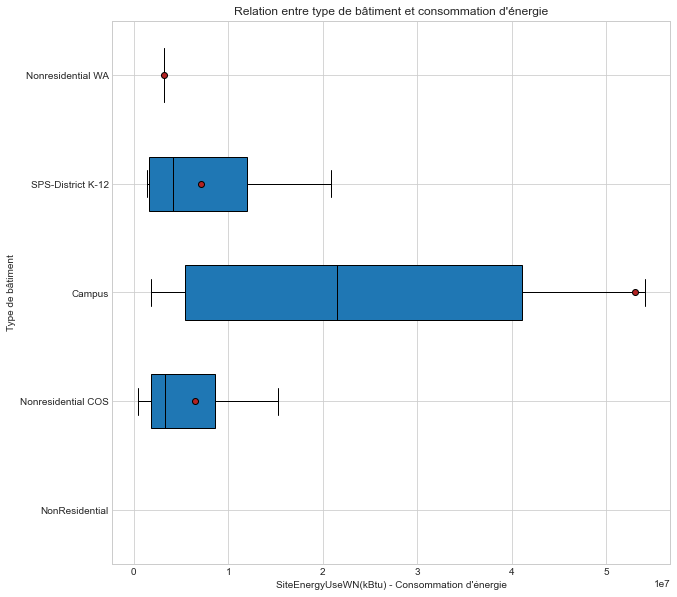

In [259]:
X = "BuildingType" # qualitative
Y = "SiteEnergyUseWN(kBtu)" # quantitative

type_batiment = data_2016.copy()
modalites = type_batiment[X].unique()
groupes = []
for m in modalites:
    groupes.append(type_batiment[type_batiment[X]==m][Y])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure(figsize=(10,10))
plt.title("Relation entre type de bâtiment et consommation d'énergie")
plt.xlabel("SiteEnergyUseWN(kBtu) - Consommation d'énergie")  
plt.ylabel("Type de bâtiment")    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

Sur ces graphiques, on constate que les campus se différencient des autres en termes de consommation d'énergie et d'émissions de CO2. On note que leurs moyennes et leurs médianes sont élevées par rapport aux autres types de bâtiment.

### Analyse du type de bâtiment et sa consommation d'énergie

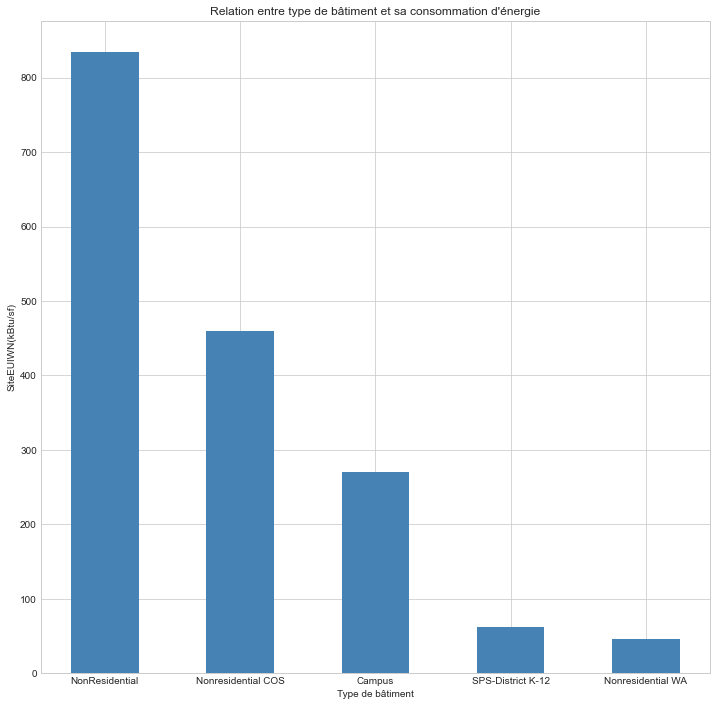

In [260]:
plt.figure(figsize=(12,12))
plt.title("Relation entre type de bâtiment et sa consommation d'énergie")
plt.ylabel("SiteEUIWN(kBtu/sf)")  
plt.xlabel("Type de bâtiment")    
plt.bar(data_2016["BuildingType"],data_2016["SiteEUIWN(kBtu/sf)"],color ='steelblue', width = 0.5)
plt.show()

Ce sont les bâtiments "NonResidential" qui consommment le plus d'énergie avec la variable "SiteEUIWN(kBtu/sf)".

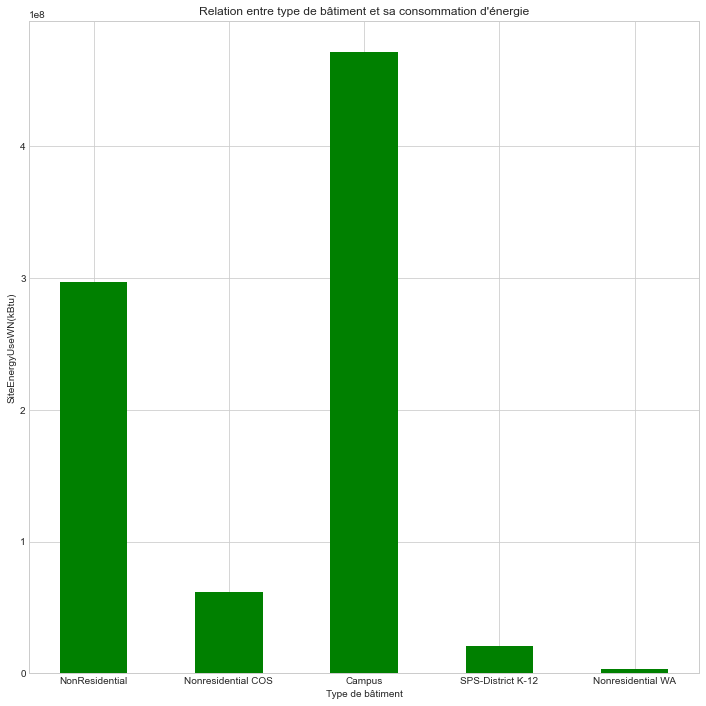

In [261]:
plt.figure(figsize=(12,12))
plt.title("Relation entre type de bâtiment et sa consommation d'énergie")
plt.ylabel("SiteEnergyUseWN(kBtu)")  
plt.xlabel("Type de bâtiment")    
plt.bar(data_2016["BuildingType"],data_2016["SiteEnergyUseWN(kBtu)"],color ='green', width = 0.5)
plt.show()

Ce sont les bâtiments "Campus" qui consomment le plus d'énergie avec la variable "SiteEnergyUseWN(kBtu)".

### Analyse du type de bâtiment et ses émissions de CO2

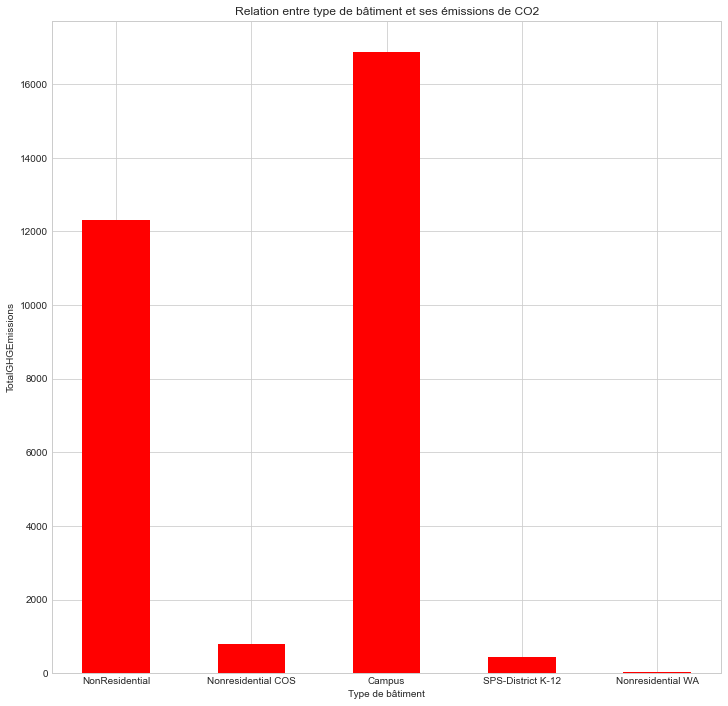

In [265]:
plt.figure(figsize=(12,12))
plt.title("Relation entre type de bâtiment et ses émissions de CO2")
plt.ylabel("TotalGHGEmissions")  
plt.xlabel("Type de bâtiment")    
plt.bar(data_2016["BuildingType"],data_2016["TotalGHGEmissions"],color ='red', width = 0.5)
plt.show()

Ce sont les bâtiments "Campus" qui émettent le plus de CO2 avec la variable "TotalGHGEmissions".

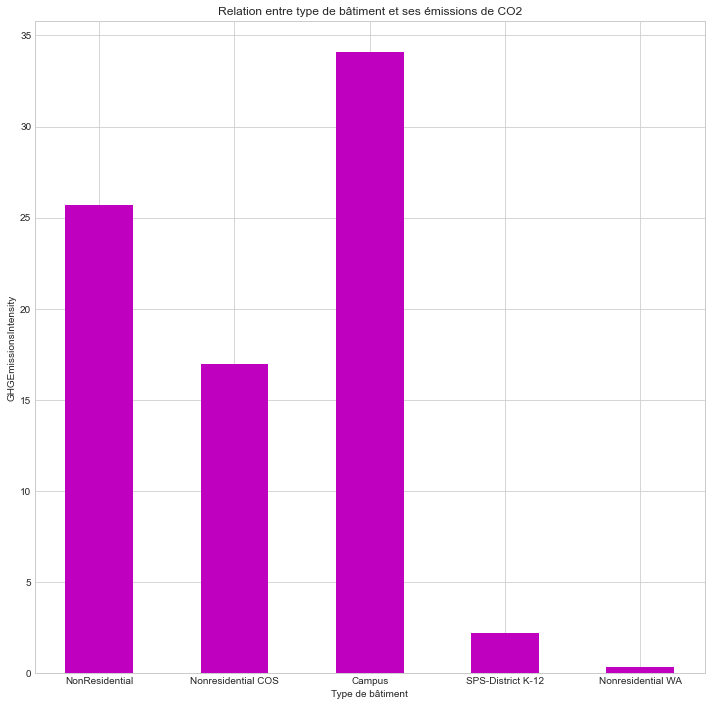

In [266]:
plt.figure(figsize=(12,12))
plt.title("Relation entre type de bâtiment et ses émissions de CO2")
plt.ylabel("GHGEmissionsIntensity")  
plt.xlabel("Type de bâtiment")    
plt.bar(data_2016["BuildingType"],data_2016["GHGEmissionsIntensity"],color ='m', width = 0.5)
plt.show()

Ce sont les bâtiments "Campus" qui émettent le plus de CO2 avec la variable "GHGEmissionsIntensity".

### Analyse de l'âge du bâtiment et sa consommation d'énergie

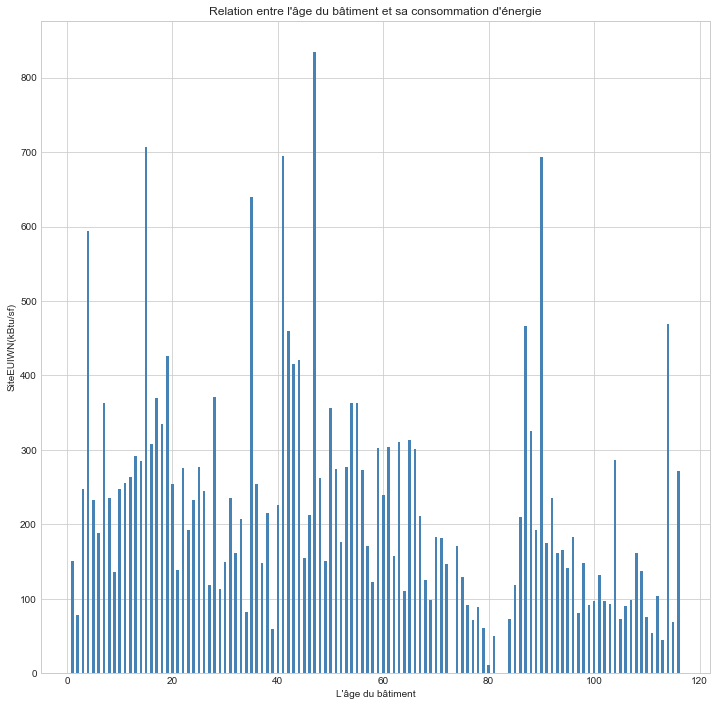

In [267]:
plt.figure(figsize=(12,12))
plt.title("Relation entre l'âge du bâtiment et sa consommation d'énergie")
plt.ylabel("SiteEUIWN(kBtu/sf)")  
plt.xlabel("L'âge du bâtiment")    
plt.bar(data_2016["Building_Age"],data_2016["SiteEUIWN(kBtu/sf)"],color ='steelblue', width = 0.5)
plt.show()

Les bâtiments agés de 5 à 45 ans consomment le plus d'énergie avec la variable "SiteEUIWN(kBtu/sf)".

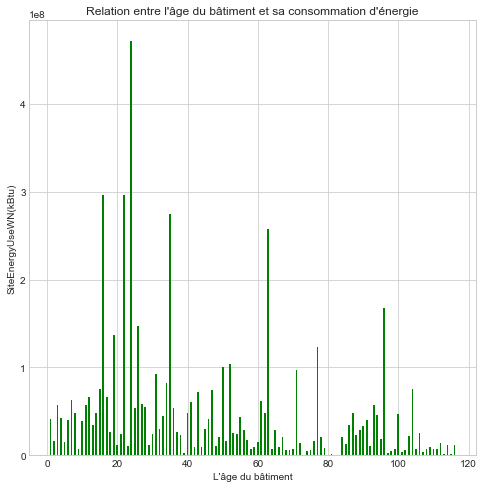

In [268]:
plt.figure(figsize=(8,8))
plt.title("Relation entre l'âge du bâtiment et sa consommation d'énergie")
plt.ylabel("SiteEnergyUseWN(kBtu)")
plt.xlabel("L'âge du bâtiment")    
plt.bar(data_2016["Building_Age"],data_2016["SiteEnergyUseWN(kBtu)"],color ='green', width = 0.5)
plt.show()

Les bâtiments agés de 15 à 35 ans avec deux pics l'un autour de 62 ans et l'autre autour de 96 ans, consomment le plus d'énergie avec la variable "SiteEnergyUseWN(kBtu)".

### Analyse de l'âge du bâtiment et ses émissions de CO2

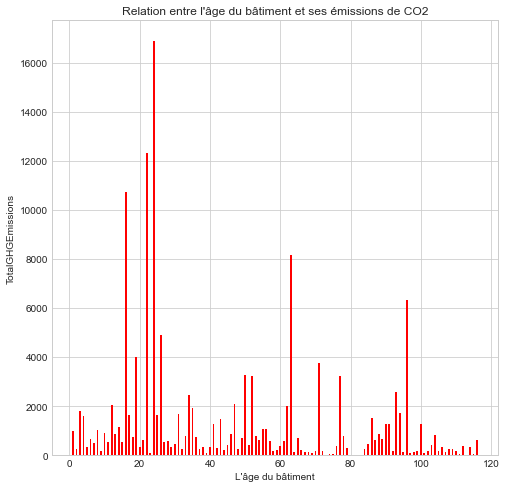

In [269]:
plt.figure(figsize=(8,8))
plt.title("Relation entre l'âge du bâtiment et ses émissions de CO2")
plt.ylabel("TotalGHGEmissions")  
plt.xlabel("L'âge du bâtiment")
plt.bar(data_2016["Building_Age"],data_2016["TotalGHGEmissions"],color ='red', width = 0.5)
plt.show()

Les bâtiments agés de 15 à 25 ans émettent le plus de CO2 avec la variable "TotalGHGEmissions".

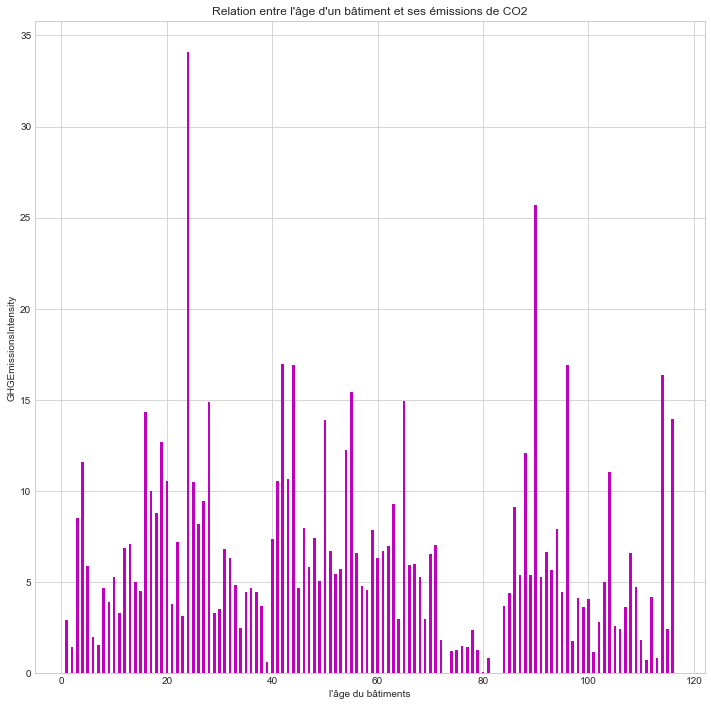

In [270]:
plt.figure(figsize=(12,12))
plt.title("Relation entre l'âge d'un bâtiment et ses émissions de CO2")
plt.ylabel("GHGEmissionsIntensity")  
plt.xlabel("l'âge du bâtiments")    
plt.bar(data_2016["Building_Age"],data_2016["GHGEmissionsIntensity"],color ='m', width = 0.5)
plt.show()

Les bâtiments agés de 15 à 30 ans  émettent le plus de CO2 avec la variable "GHGEmissionsIntensity". Ceux entre 70 et 83 ans émettent très peu voir pas (car peu de construction à cause de la grande dépression aux US).

On va créer une nouvelle variable "distance" avec les variables "Latitude" et "Longitude". on va prendre comme point de référence un bâtiment au centre de la ville à "Downtown". Puis on va supprimer les variables "Latitude" et "Longitude".

In [271]:
point_ref = data_2016[data_brut["Neighborhood"].str.contains("DOWNTOWN")]

<ipython-input-271-1a19150f7ed3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  point_ref = data_2016[data_brut["Neighborhood"].str.contains("DOWNTOWN")]


In [272]:
point_ref.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,Neighborhood,Latitude,Longitude,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Building_Age,source_nrj,geometry
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101,DOWNTOWN,47.61220,-122.33799,...,7226362.5,7456910.0,2003882.00,3946027.0,1276453.0,249.98,2.83,89,7226362.00,POINT (-122.33799 47.61220)
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101,DOWNTOWN,47.61317,-122.33393,...,8387933.0,8664479.0,0.00,3242851.0,5145082.0,295.86,2.86,20,8387933.00,POINT (-122.33393 47.61317)
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101,DOWNTOWN,47.61393,-122.33810,...,72587024.0,73937112.0,21566554.00,49526664.0,1493800.0,2089.28,2.19,47,72587018.00,POINT (-122.33810 47.61393)
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101,DOWNTOWN,47.61412,-122.33664,...,6794584.0,6946800.5,2214446.25,2768924.0,1811213.0,286.43,4.67,90,6794583.25,POINT (-122.33664 47.61412)
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121,DOWNTOWN,47.61375,-122.34047,...,14172606.0,14656503.0,0.00,5368607.0,8803998.0,505.01,2.88,36,14172605.00,POINT (-122.34047 47.61375)


In [273]:
from numpy import sin, cos, arccos, pi, round 

def rad2deg(radians): 
    degres = radians * 180 / pi 
    return degres 
def deg2rad(degres): 
    radians = degres * pi / 180 
    return radians 
def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2 , longitude2, unit = 'kilomètres'): 
    theta = longitude1 - longitude2 
    distance = 60 * 1.1515 * rad2deg( arccos( (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + (cos(deg2rad(latitude1) ) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))))
    if unit == 'miles': 
        return round(distance, 2) 
    if unit == 'kilomètres': 
        return round(distance * 1.609344, 2)


Je vais prendre comme point de référence le bâtiment ayant comme coordonnées "Latitude" à 47.61412 et "Longitude" à -122.33664 ;

In [127]:
lat_ref = 47.61412
long_ref = -122.33664
data_2016["Distance"] = getDistanceBetweenPointsNew(lat_ref, long_ref, data_2016["Latitude"], data_2016["Longitude"], unit = 'kilomètres')

In [128]:
data_2016.describe()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Building_Age,source_nrj,Distance
count,1502.000000,1502.000000,1502.000000,1502.000000,1.502000e+03,1502.000000,1.502000e+03,1.498000e+03,804.000000,315.000000,...,1.502000e+03,1.501000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1502.000000,1502.000000,1502.000000,1.502000e+03,1502.000000
mean,47.616222,-122.333527,1.108522,4.221039,1.140800e+05,13601.033289,1.004790e+05,9.435868e+04,35666.647135,13860.433012,...,8.308721e+06,8.534012e+06,5.023136e+05,5.721091e+06,2.066178e+06,188.391305,1.688296,54.338881,8.289583e+06,4.392617
std,0.047416,0.023370,1.210467,6.772629,1.960537e+05,43669.721316,1.741468e+05,1.639929e+05,66071.229289,36743.044136,...,2.253059e+07,2.307242e+07,5.372859e+06,1.387631e+07,9.850963e+06,737.923096,2.436005,32.519993,2.251689e+07,3.415383
min,47.509590,-122.411820,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,...,5.713320e+04,5.811420e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.400000,0.010000,1.000000,5.713300e+04,0.000000
25%,47.586703,-122.343093,1.000000,1.000000,2.880000e+04,0.000000,2.780950e+04,2.518800e+04,5120.000000,2429.000000,...,1.244409e+06,1.328072e+06,0.000000e+00,7.264078e+05,0.000000e+00,20.645000,0.360000,28.000000,1.244409e+06,1.360000
50%,47.612420,-122.333160,1.000000,2.000000,4.789950e+04,0.000000,4.579250e+04,4.219000e+04,11794.500000,5471.000000,...,2.709868e+06,2.830650e+06,0.000000e+00,1.711462e+06,4.922630e+05,49.845000,0.890000,51.000000,2.701853e+06,3.755000
75%,47.649032,-122.322823,1.000000,4.000000,1.046775e+05,0.000000,9.449300e+04,9.209825e+04,30614.500000,11848.000000,...,7.256966e+06,7.483350e+06,0.000000e+00,5.247486e+06,1.534892e+06,146.982500,1.980000,86.000000,7.256966e+06,6.640000
max,47.733870,-122.261800,27.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,639931.000000,459748.000000,...,4.483853e+08,4.716139e+08,1.349435e+08,2.745325e+08,2.979090e+08,16870.980000,34.090000,116.000000,4.483853e+08,13.400000


In [129]:
# On supprime les variables "Latitude" et "Longitude".
del  data_2016["Latitude"]
del  data_2016["Longitude"]

In [130]:
data_2016.describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Building_Age,source_nrj,Distance
count,1502.000000,1502.000000,1.502000e+03,1502.000000,1.502000e+03,1.498000e+03,804.000000,315.000000,1502.000000,1501.000000,...,1.502000e+03,1.501000e+03,1.502000e+03,1.502000e+03,1.502000e+03,1502.000000,1502.000000,1502.000000,1.502000e+03,1502.000000
mean,1.108522,4.221039,1.140800e+05,13601.033289,1.004790e+05,9.435868e+04,35666.647135,13860.433012,75.322969,78.294004,...,8.308721e+06,8.534012e+06,5.023136e+05,5.721091e+06,2.066178e+06,188.391305,1.688296,54.338881,8.289583e+06,4.392617
std,1.210467,6.772629,1.960537e+05,43669.721316,1.741468e+05,1.639929e+05,66071.229289,36743.044136,75.914893,76.871658,...,2.253059e+07,2.307242e+07,5.372859e+06,1.387631e+07,9.850963e+06,737.923096,2.436005,32.519993,2.251689e+07,3.415383
min,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.400000,1.500000,...,5.713320e+04,5.811420e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.400000,0.010000,1.000000,5.713300e+04,0.000000
25%,1.000000,1.000000,2.880000e+04,0.000000,2.780950e+04,2.518800e+04,5120.000000,2429.000000,34.900002,37.299999,...,1.244409e+06,1.328072e+06,0.000000e+00,7.264078e+05,0.000000e+00,20.645000,0.360000,28.000000,1.244409e+06,1.360000
50%,1.000000,2.000000,4.789950e+04,0.000000,4.579250e+04,4.219000e+04,11794.500000,5471.000000,53.599998,56.299999,...,2.709868e+06,2.830650e+06,0.000000e+00,1.711462e+06,4.922630e+05,49.845000,0.890000,51.000000,2.701853e+06,3.755000
75%,1.000000,4.000000,1.046775e+05,0.000000,9.449300e+04,9.209825e+04,30614.500000,11848.000000,85.174997,88.500000,...,7.256966e+06,7.483350e+06,0.000000e+00,5.247486e+06,1.534892e+06,146.982500,1.980000,86.000000,7.256966e+06,6.640000
max,27.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,639931.000000,459748.000000,834.400024,834.400024,...,4.483853e+08,4.716139e+08,1.349435e+08,2.745325e+08,2.979090e+08,16870.980000,34.090000,116.000000,4.483853e+08,13.400000


### On va sélectionner les variables pertinentes pour la modélisation
La prédiction se basera sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...). L’objectif est de se passer des relevés de consommation annuels futurs, on va écarter de notre jeu de données les variables "SteamUse(kBtu)", "Electricity(kBtu)" et "NaturalGas(kBtu)".  

In [131]:
var_garde=["OSEBuildingID","BuildingType","PrimaryPropertyType","ENERGYSTARScore","SiteEnergyUseWN(kBtu)","SiteEUIWN(kBtu/sf)","TotalGHGEmissions","GHGEmissionsIntensity","Neighborhood",
           "Building_Age","Distance","NumberofFloors","NumberofBuildings","PropertyGFATotal",
           ]
data_var_garde=data_2016[var_garde]
data_var_garde.set_index("OSEBuildingID", inplace=True)

In [132]:
data_var_garde.describe()

,SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity,Building_Age,Distance,NumberofFloors,NumberofBuildings,PropertyGFATotal
count,1.501000e+03,1501.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1.502000e+03
mean,8.534012e+06,78.294004,188.391305,1.688296,54.338881,4.392617,4.221039,1.108522,1.140800e+05
std,2.307242e+07,76.871658,737.923096,2.436005,32.519993,3.415383,6.772629,1.210467,1.960537e+05
min,5.811420e+04,1.500000,0.400000,0.010000,1.000000,0.000000,0.000000,0.000000,1.128500e+04
25%,1.328072e+06,37.299999,20.645000,0.360000,28.000000,1.360000,1.000000,1.000000,2.880000e+04
50%,2.830650e+06,56.299999,49.845000,0.890000,51.000000,3.755000,2.000000,1.000000,4.789950e+04
75%,7.483350e+06,88.500000,146.982500,1.980000,86.000000,6.640000,4.000000,1.000000,1.046775e+05
max,4.716139e+08,834.400024,16870.980000,34.090000,116.000000,13.400000,99.000000,27.000000,2.200000e+06


In [133]:
data_var_garde.isna().sum()

BuildingType               0
PrimaryPropertyType        0
ENERGYSTARScore          524
SiteEnergyUseWN(kBtu)      1
SiteEUIWN(kBtu/sf)         1
TotalGHGEmissions          0
GHGEmissionsIntensity      0
Neighborhood               0
Building_Age               0
Distance                   0
NumberofFloors             0
NumberofBuildings          0
PropertyGFATotal           0
dtype: int64

In [134]:
data_var_garde.dropna(subset = ["SiteEnergyUseWN(kBtu)"], inplace=True)

<ipython-input-134-7101f752973a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_var_garde.dropna(subset = ["SiteEnergyUseWN(kBtu)"], inplace=True)


In [135]:
data_var_garde.dropna(subset = ["SiteEUIWN(kBtu/sf)"], inplace=True)

<ipython-input-135-ca5c49976abf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_var_garde.dropna(subset = ["SiteEUIWN(kBtu/sf)"], inplace=True)


In [136]:
data_var_garde.isna().sum()

BuildingType               0
PrimaryPropertyType        0
ENERGYSTARScore          524
SiteEnergyUseWN(kBtu)      0
SiteEUIWN(kBtu/sf)         0
TotalGHGEmissions          0
GHGEmissionsIntensity      0
Neighborhood               0
Building_Age               0
Distance                   0
NumberofFloors             0
NumberofBuildings          0
PropertyGFATotal           0
dtype: int64

In [137]:
mediane_nrjscore = data_var_garde["ENERGYSTARScore"].median(skipna = True) 
data_var_garde["ENERGYSTARScore"] = data_var_garde["ENERGYSTARScore"].fillna(mediane_nrjscore)

<ipython-input-137-8628935f16d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_var_garde["ENERGYSTARScore"] = data_var_garde["ENERGYSTARScore"].fillna(mediane_nrjscore)


In [138]:
data_var_garde.isna().mean()

BuildingType             0.0
PrimaryPropertyType      0.0
ENERGYSTARScore          0.0
SiteEnergyUseWN(kBtu)    0.0
SiteEUIWN(kBtu/sf)       0.0
TotalGHGEmissions        0.0
GHGEmissionsIntensity    0.0
Neighborhood             0.0
Building_Age             0.0
Distance                 0.0
NumberofFloors           0.0
NumberofBuildings        0.0
PropertyGFATotal         0.0
dtype: float64

In [139]:
data_var_garde.isnull().sum()

BuildingType             0
PrimaryPropertyType      0
ENERGYSTARScore          0
SiteEnergyUseWN(kBtu)    0
SiteEUIWN(kBtu/sf)       0
TotalGHGEmissions        0
GHGEmissionsIntensity    0
Neighborhood             0
Building_Age             0
Distance                 0
NumberofFloors           0
NumberofBuildings        0
PropertyGFATotal         0
dtype: int64

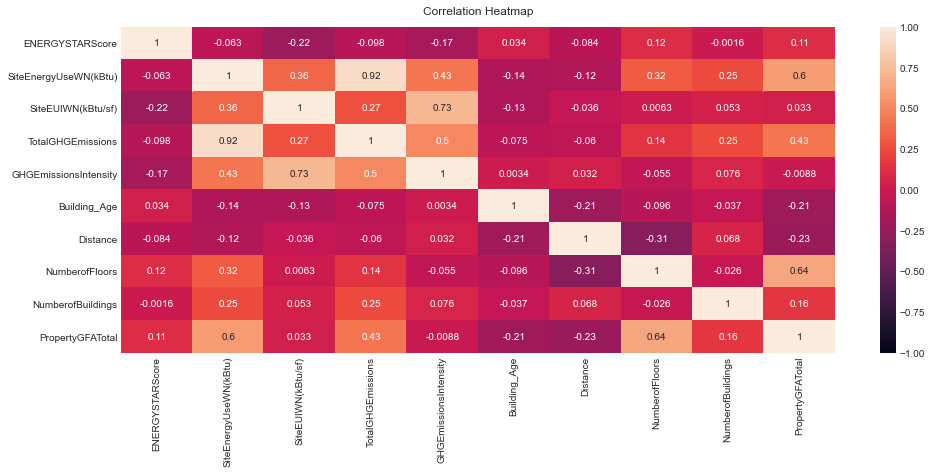

In [140]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_var_garde.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [141]:
data_var_garde.to_csv("data_nettoye.csv")

In [142]:
data_var_garde.shape

(1501, 13)